# Exploratory Data Analysis Starter

## 1. Import packages

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## 2. Loading data with Pandas

In [79]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [80]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [81]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## 3. Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

In [82]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [83]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [84]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [85]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [86]:
#[client_df[col].unique() for col in client_df.columns]

In [87]:
for col in client_df.columns:
    print(col, ":", client_df[col].nunique())

id : 14606
channel_sales : 8
cons_12m : 11065
cons_gas_12m : 2112
cons_last_month : 4751
date_activ : 1796
date_end : 368
date_modif_prod : 2129
date_renewal : 386
forecast_cons_12m : 13993
forecast_cons_year : 4218
forecast_discount_energy : 12
forecast_meter_rent_12m : 3528
forecast_price_energy_off_peak : 516
forecast_price_energy_peak : 329
forecast_price_pow_off_peak : 41
has_gas : 2
imp_cons : 7752
margin_gross_pow_ele : 2391
margin_net_pow_ele : 2391
nb_prod_act : 10
net_margin : 11965
num_years_antig : 13
origin_up : 6
pow_max : 698
churn : 2


In [88]:
[client_df[col].value_counts() for col in client_df.columns]

[id
 24011ae4ebbe3035111d65fa7c15bc57    1
 2fae70276cd7a4874a2aefcd68d5a184    1
 a7a9dac0ffc2ad56c66a1b08d53d0e51    1
 6cfbce2099a4163ea4fe422fb28829ea    1
 4289e929ecd35a0754e697feb24a091b    1
                                    ..
 0b69432a3ceee7763bf86ffe30c6bc2d    1
 6cabca88c760284183f51f84e4a27b1e    1
 de92494d7140dc94be6a1ebafaf98056    1
 a8e828bfad0869527e9acdd39a36cc91    1
 563dde550fd624d7352f3de77c0cdfcd    1
 Name: count, Length: 14606, dtype: int64,
 channel_sales
 foosdfpfkusacimwkcsosbicdxkicaua    6754
 MISSING                             3725
 lmkebamcaaclubfxadlmueccxoimlema    1843
 usilxuppasemubllopkaafesmlibmsdf    1375
 ewpakwlliwisiwduibdlfmalxowmwpci     893
 sddiedcslfslkckwlfkdpoeeailfpeds      11
 epumfxlbckeskwekxbiuasklxalciiuu       3
 fixdbufsefwooaasfcxdxadsiekoceaa       2
 Name: count, dtype: int64,
 cons_12m
 0          117
 2882597     27
 3329244     24
 1743025     18
 3926060     18
           ... 
 22927        1
 2630         1
 6346  

In [89]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [90]:
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [91]:
for col in price_df.columns:
    print(col, ":", price_df[col].nunique())

id : 16096
price_date : 12
price_off_peak_var : 1853
price_peak_var : 1189
price_mid_peak_var : 711
price_off_peak_fix : 66
price_peak_fix : 31
price_mid_peak_fix : 28


In [92]:
[price_df[col].value_counts() for col in price_df.columns]

[id
 038af19179925da21a25619c5a24b745    12
 97589d95ec46ab31ef238d18a616403f    12
 97adbcd721fae4874f7ee287ea84200d    12
 d74b4544363be674855cf931b6b8af25    12
 27276020e48d73f589788d4e37c51879    12
                                     ..
 83cf18b07114e495ae8b7fb235e45ee2     8
 3e459d61dc831e29f8a9a9a59f95efd2     8
 c5dcd5c506e565aaabffa29bc1ec0a37     7
 bf89f2d8c1b133a134fd93603cb4c947     7
 15b36e47cf04bf151e3f4438d12672e5     7
 Name: count, Length: 16096, dtype: int64,
 price_date
 2015-08-01    16094
 2015-12-01    16094
 2015-07-01    16090
 2015-11-01    16087
 2015-06-01    16085
 2015-10-01    16085
 2015-02-01    16082
 2015-09-01    16082
 2015-05-01    16080
 2015-04-01    16079
 2015-03-01    16074
 2015-01-01    16070
 Name: count, dtype: int64,
 price_off_peak_var
 0.152445    6291
 0.151367    5652
 0.125976    5139
 0.127566    4373
 0.147600    4285
             ... 
 0.140656       1
 0.124354       1
 0.149091       1
 0.119542       1
 0.124808       1
 Na

---

## 4. Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [93]:
#price_df.corr()

In [94]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

## Churn

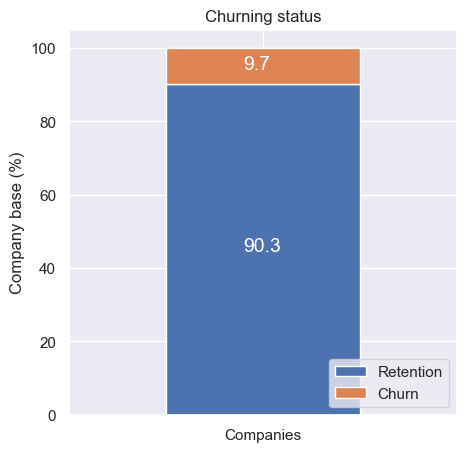

In [95]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 10% of total customers churned.

## Sales channel

### Plotting the sales with respect to the id and churn
i. We try to create a plot by grouping channel sales and churn and then count the number of id's for each of these combinations

In [96]:
channel = client_df[['id','channel_sales','churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count()

Text(0, 0.5, 'Company base (%)')

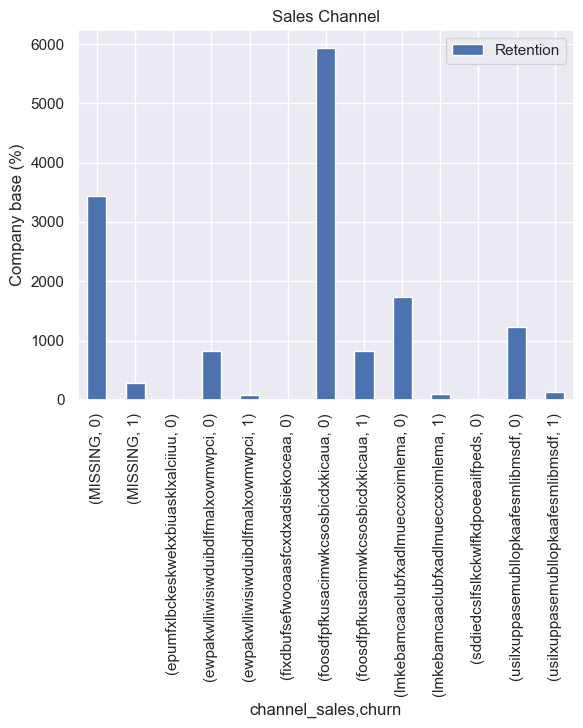

In [97]:
channel.plot(kind="bar", stacked=True)
plt.title("Sales Channel")
plt.legend(["Retention", "Churn"])
plt.ylabel("Company base (%)")

ii. The graph is slowing the data, but is not very visually appealing 
because of the placement of the x-labels.
So, we use annotation function to plot the graph.

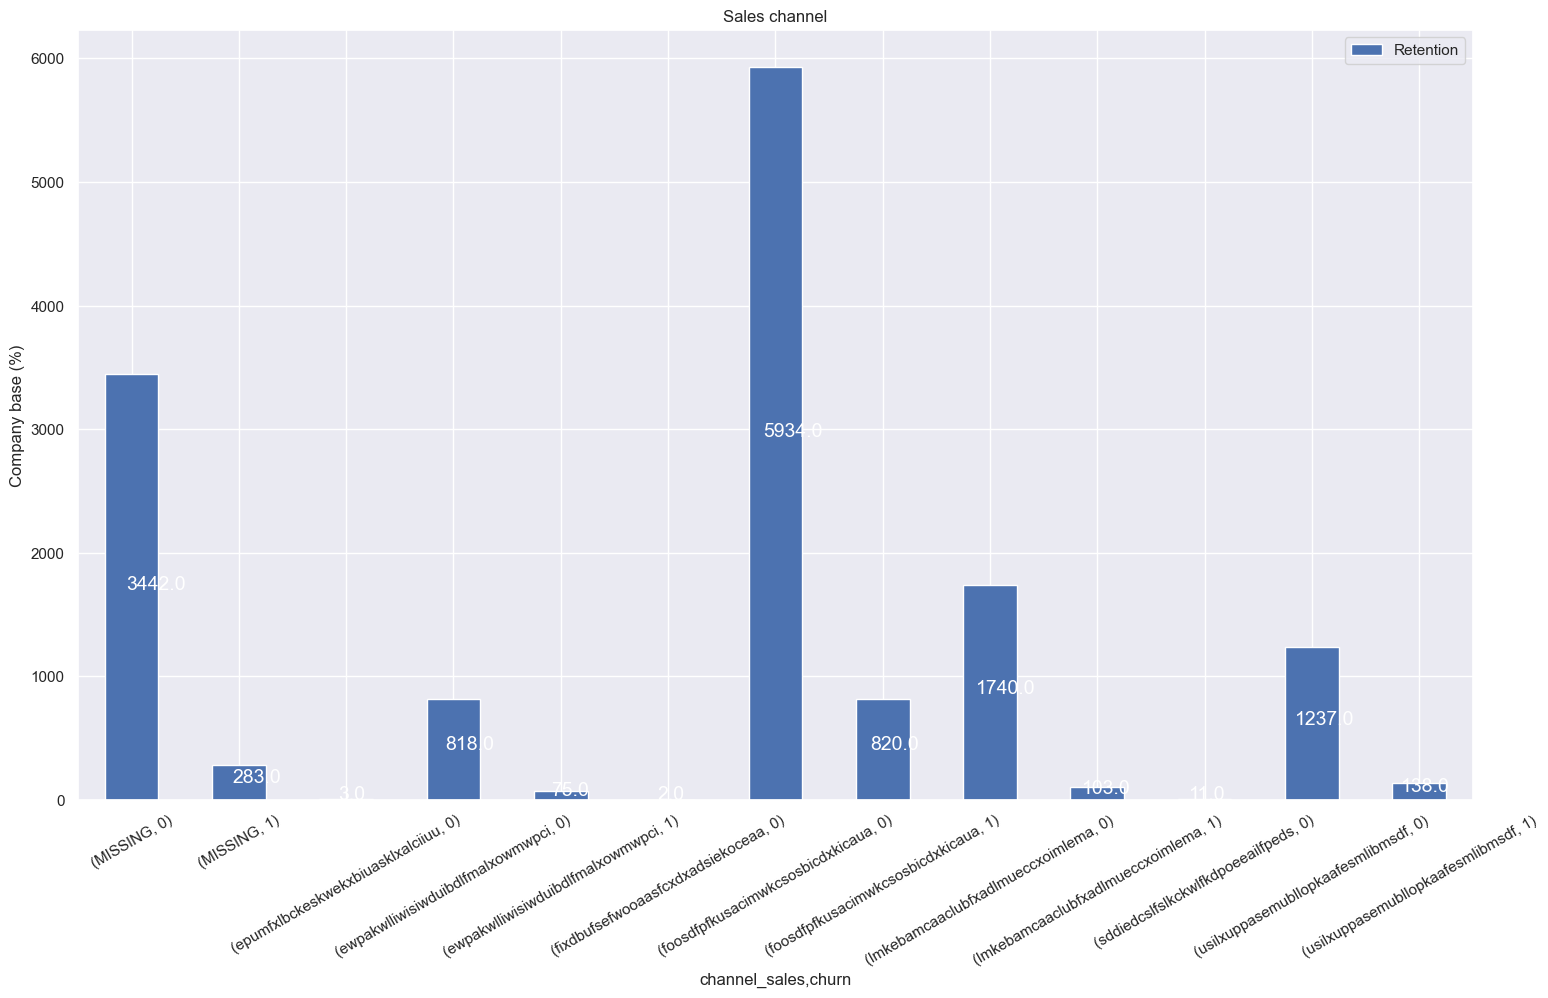

In [98]:
channel = client_df[['id','channel_sales','churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count()
plot_stacked_bars(channel, 'Sales channel', rot_=30)

ii. The graph still seems to be cluttered and not very informative and direct. If you observe clearly, you would find that the x-axis is a group of channel and churn pairs. So, we would try to unstack them. (Converting row index to column axis)

Unstacking is done based on levels. And default value is -1(last level).

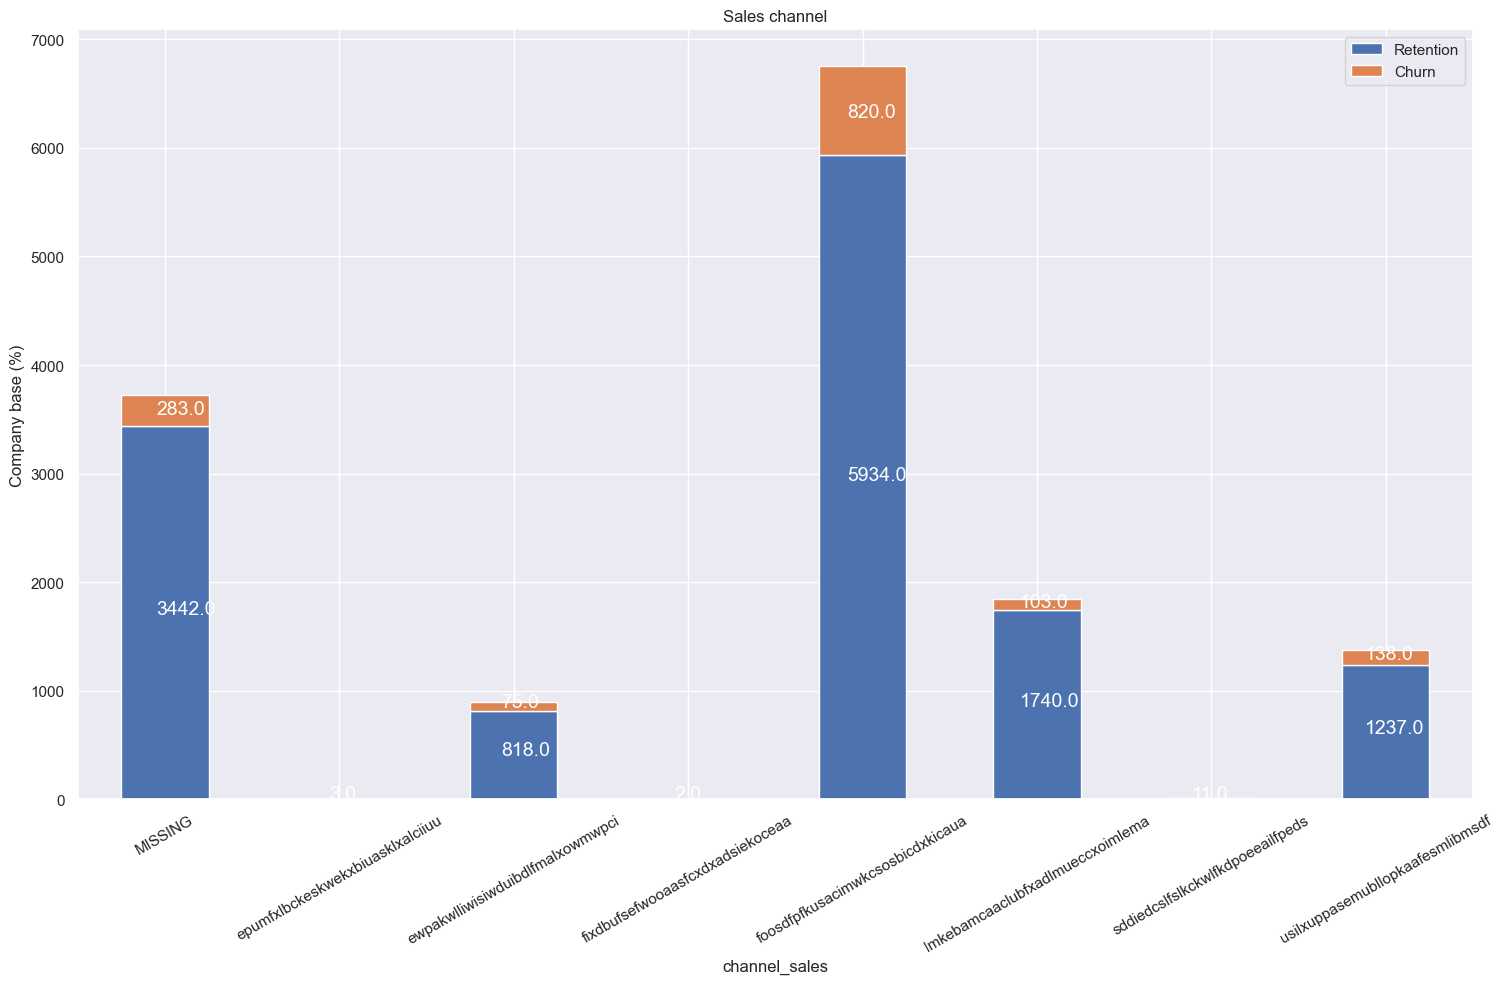

In [99]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack().fillna(0)
plot_stacked_bars(channel, 'Sales channel', rot_=30)

iii. Let us try using level= 0 and level =1

Level 0 has converted channel_sales to column and we have churn as row. So, it will stack channel_sales values for each value of churn.

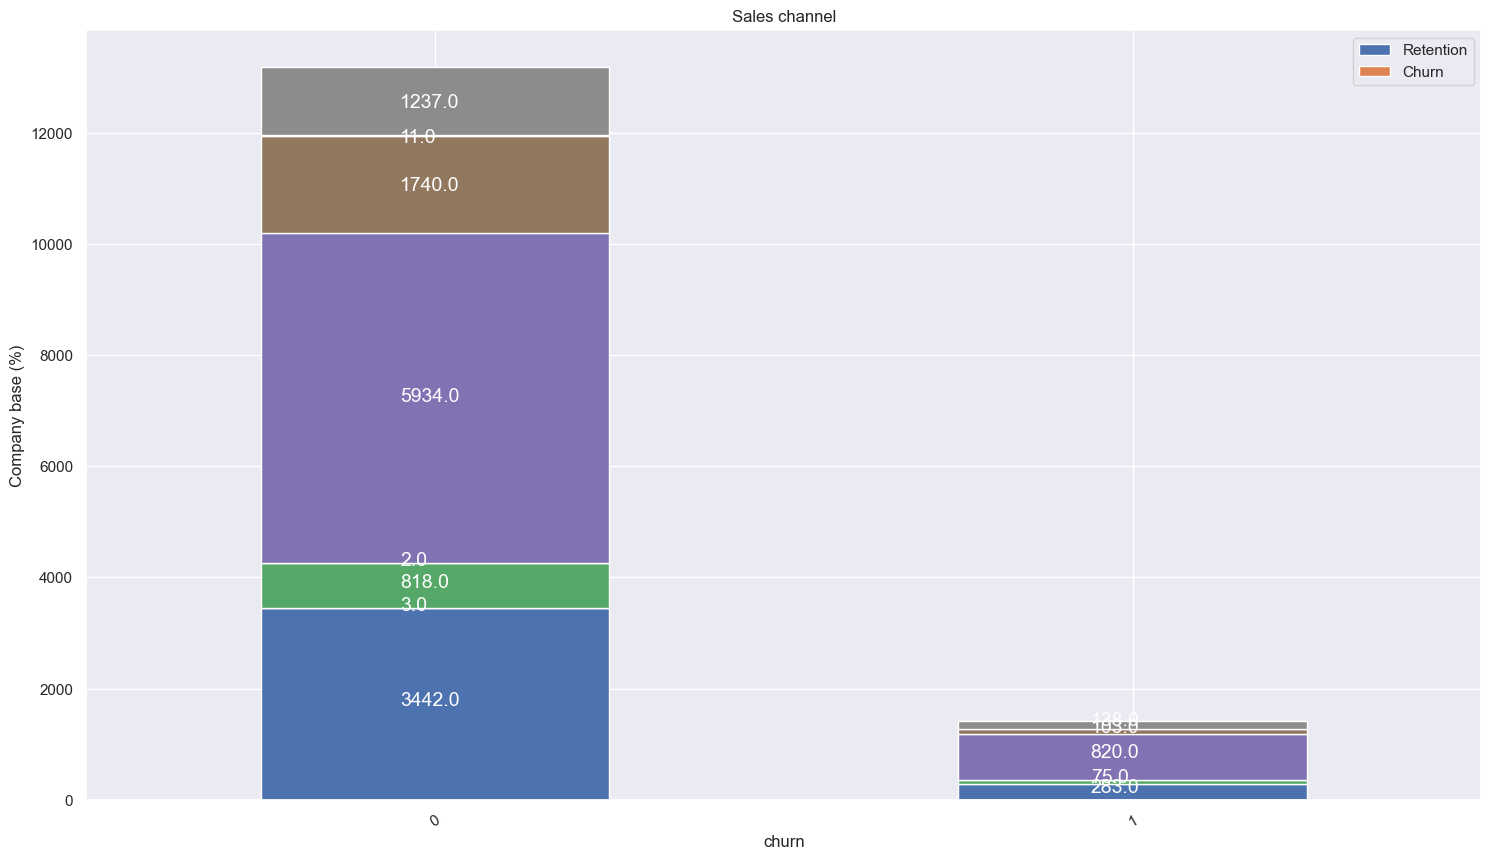

In [100]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=0).fillna(0)
plot_stacked_bars(channel, 'Sales channel', rot_=30)

For level=1, we get the same results as level=-1 as there are only 2 columns initially
ie. channel_sales and churn.

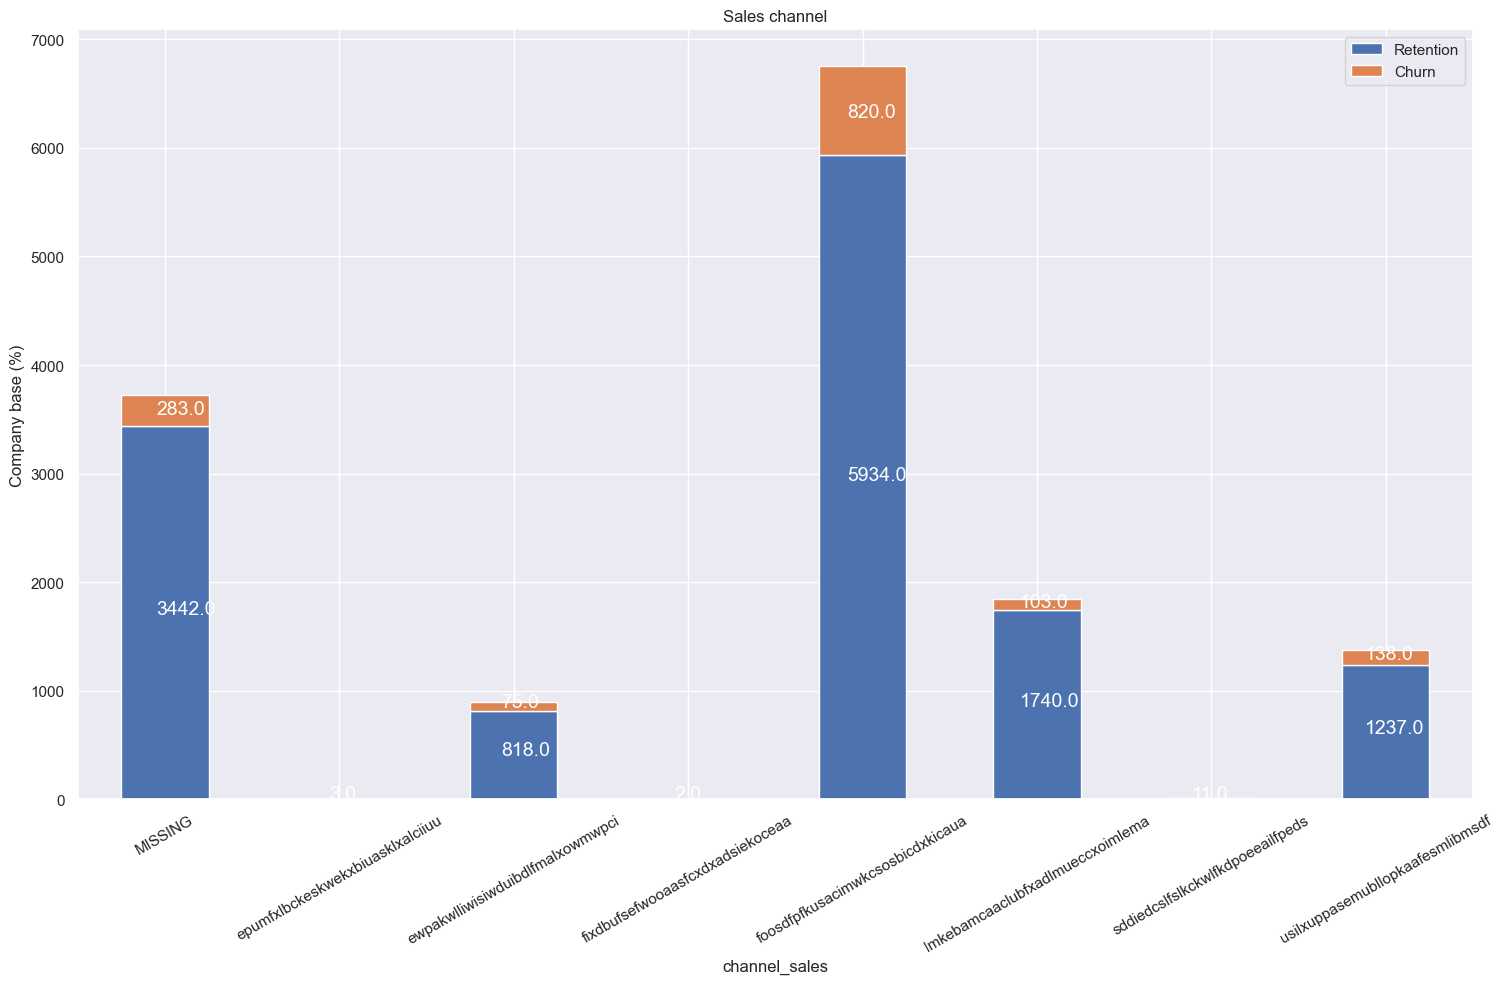

In [101]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
plot_stacked_bars(channel, 'Sales channel', rot_=30)

iv. Above graph is giving us the retention and churn values of each channel.
In order to better understand data, we need to consider what percent of each 
channel is getting churned.

Suppose, we have the above table, here, col 0 would be channel_sales and
col 1 would be churn.
So, for each channel, we divide the churn(ie. 1) by sum of channel

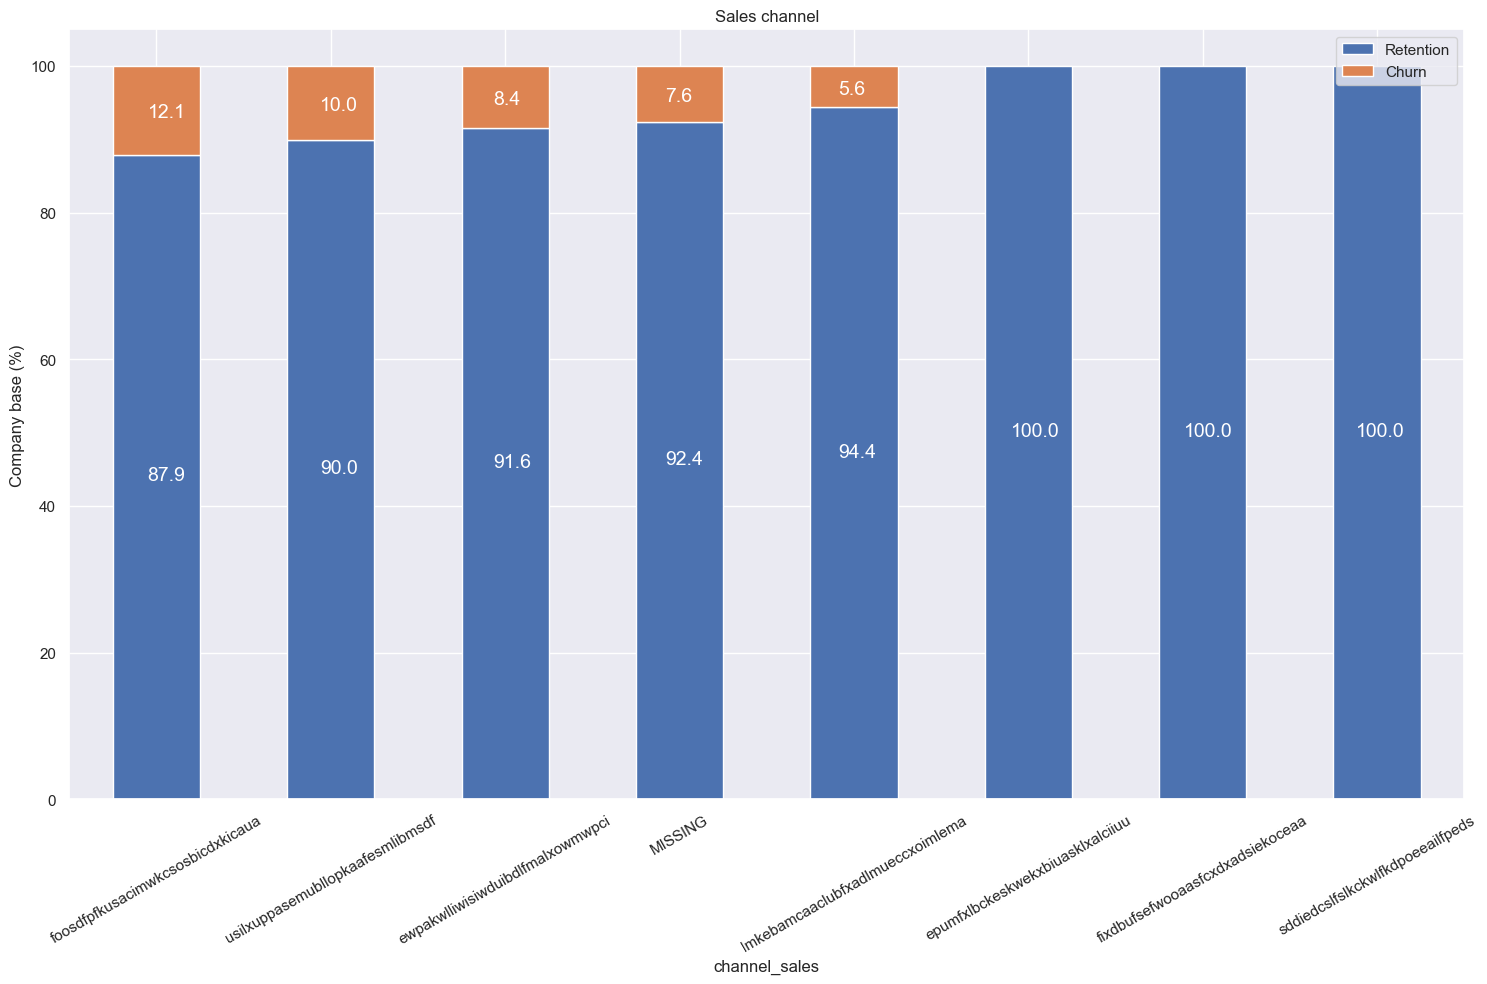

In [102]:
channel = client_df[['id','channel_sales','churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[0], ascending=True)
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

Churn varies across various channels. Some channels have 0 churn while others churn till 12%.

## VISUALIZING PRICE_DATA.CSV

### PRICE OF ENERGY

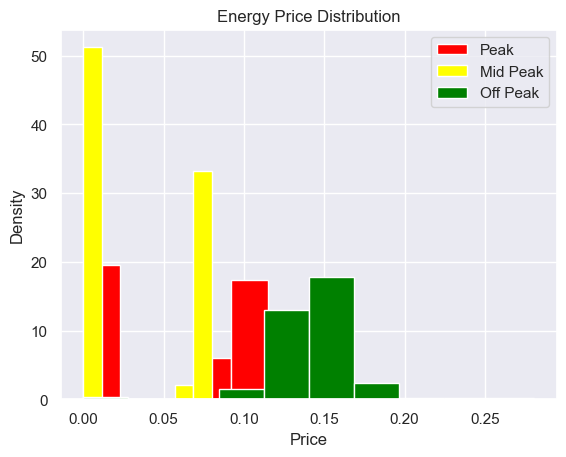

In [103]:
#price_df["price_off_peak_var","price_peak_var"].plot(kind="hist")
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.hist(price_df['price_peak_var'], density=True, histtype='bar', color='red', label='Peak')
plt.hist(price_df['price_mid_peak_var'], density=True, histtype='bar', color='yellow', label='Mid Peak')
plt.hist(price_df['price_off_peak_var'], density=True, histtype='bar', color='green', label='Off Peak')
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Energy Price Distribution')
plt.legend()
plt.show()

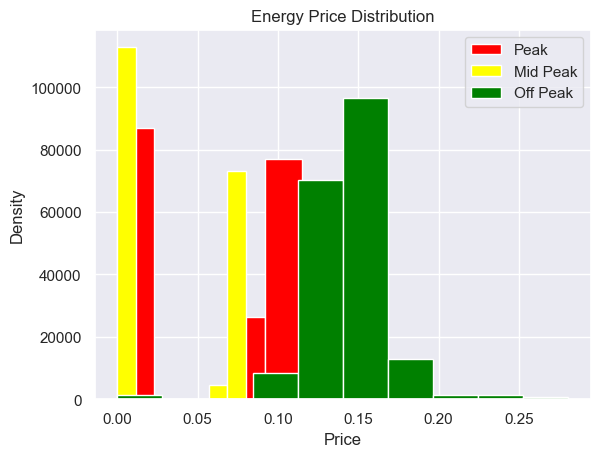

In [104]:
#price_df["price_off_peak_var","price_peak_var"].plot(kind="hist")
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.hist(price_df['price_peak_var'], histtype='bar', color='red', label='Peak')
plt.hist(price_df['price_mid_peak_var'], histtype='bar', color='yellow', label='Mid Peak')
plt.hist(price_df['price_off_peak_var'], histtype='bar', color='green', label='Off Peak')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Energy Price Distribution')
plt.legend()
plt.show()

In [105]:
#price_df["price_off_peak_var"].plot(kind="hist")

In [106]:
#price_df["price_peak_var"].plot(kind='hist')

In [107]:
#price_df["price_mid_peak_var"].plot(kind='hist')

### PRICE OF POWER

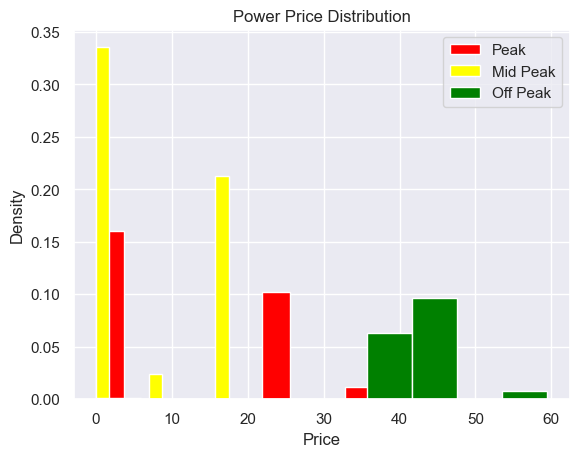

In [108]:
plt.hist(price_df['price_peak_fix'], density=True, histtype='bar', color='red', label='Peak')
plt.hist(price_df['price_mid_peak_fix'], density=True, histtype='bar', color='yellow', label='Mid Peak')
plt.hist(price_df['price_off_peak_fix'], density=True, histtype='bar', color='green', label='Off Peak')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Power Price Distribution')
plt.legend()
plt.show()

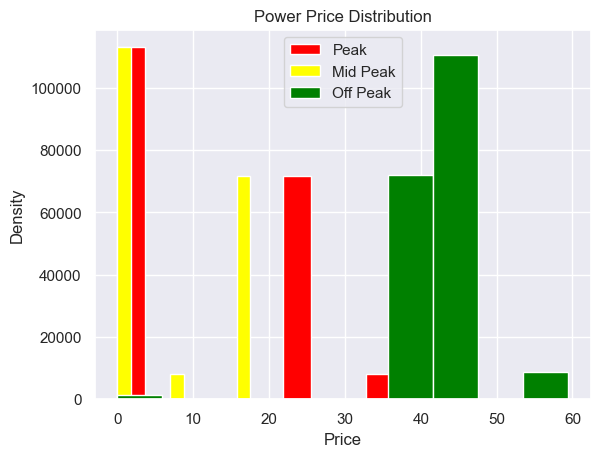

In [109]:
plt.hist(price_df['price_peak_fix'], histtype='bar', color='red', label='Peak')
plt.hist(price_df['price_mid_peak_fix'], histtype='bar', color='yellow', label='Mid Peak')
plt.hist(price_df['price_off_peak_fix'], histtype='bar', color='green', label='Off Peak')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Power Price Distribution')
plt.legend()
plt.show()

## VISUALIZING CLIENT_DATA.CSV

In [110]:
def plotdistribution(dataframe, column, ax, bins_=50):
    temp = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"]==0][column],
        "Churn": dataframe[dataframe["churn"]==1][column]
    })
    temp[["Retention","Churn"]].plot(kind='hist', ax=ax, bins= bins_, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

In [111]:
consumption = client_df[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]

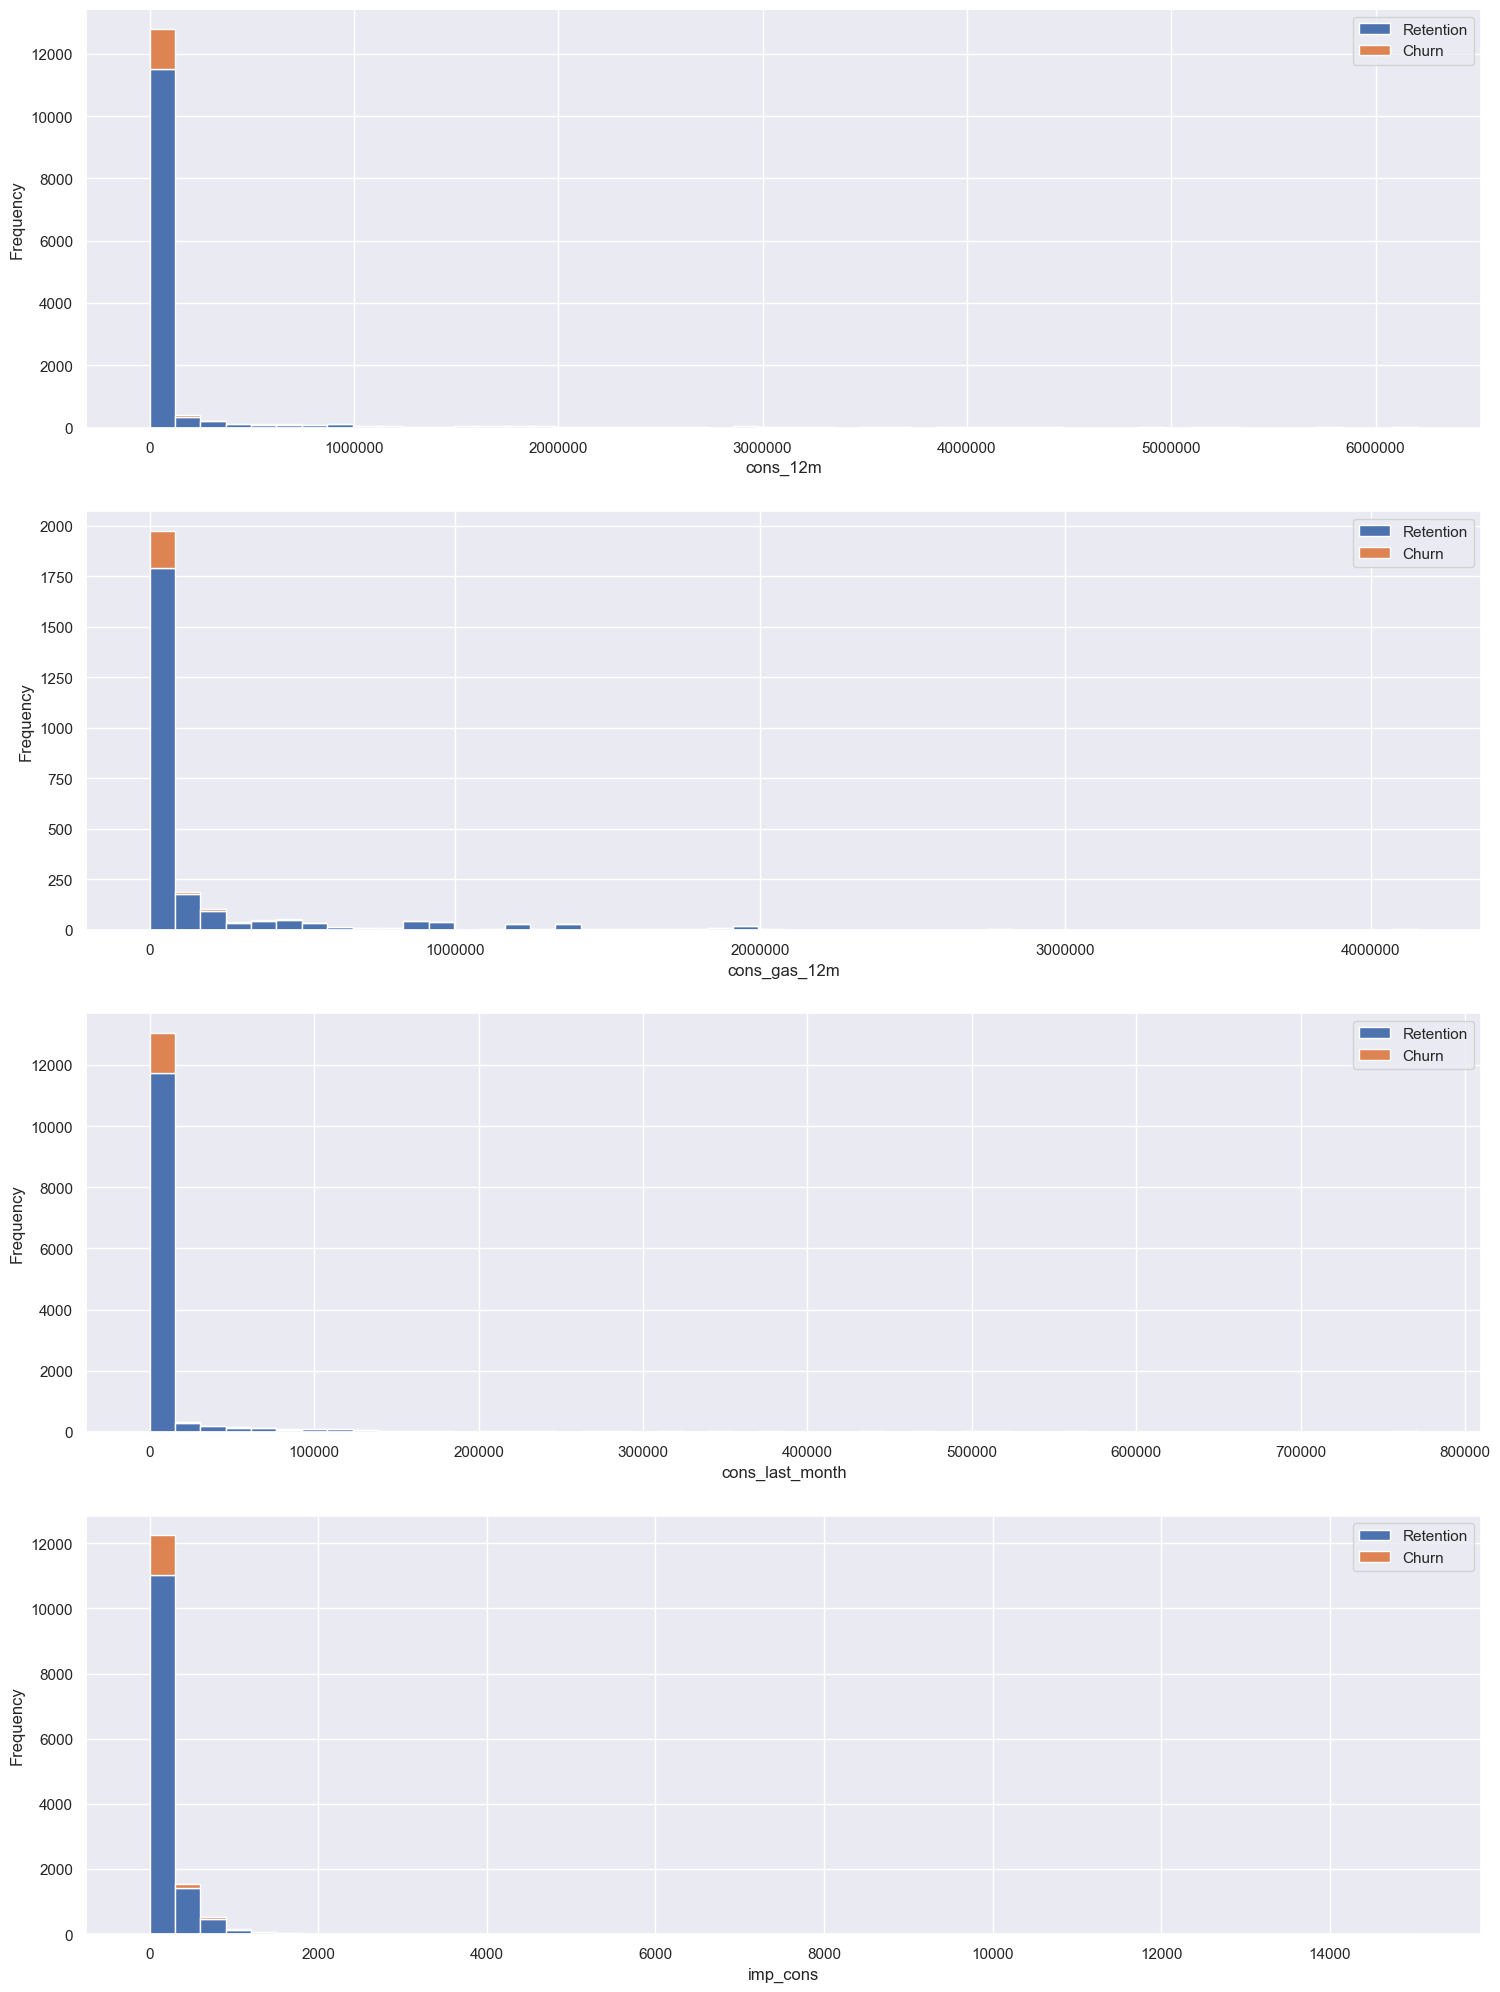

In [112]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

axs= axs.flatten()

plotdistribution(consumption, 'cons_12m', axs[0])
plotdistribution(consumption[consumption['has_gas']=='t'], 'cons_gas_12m', axs[1])
plotdistribution(consumption, 'cons_last_month', axs[2])
plotdistribution(consumption, 'imp_cons', axs[3])

#plt.tight_layout()
plt.show()


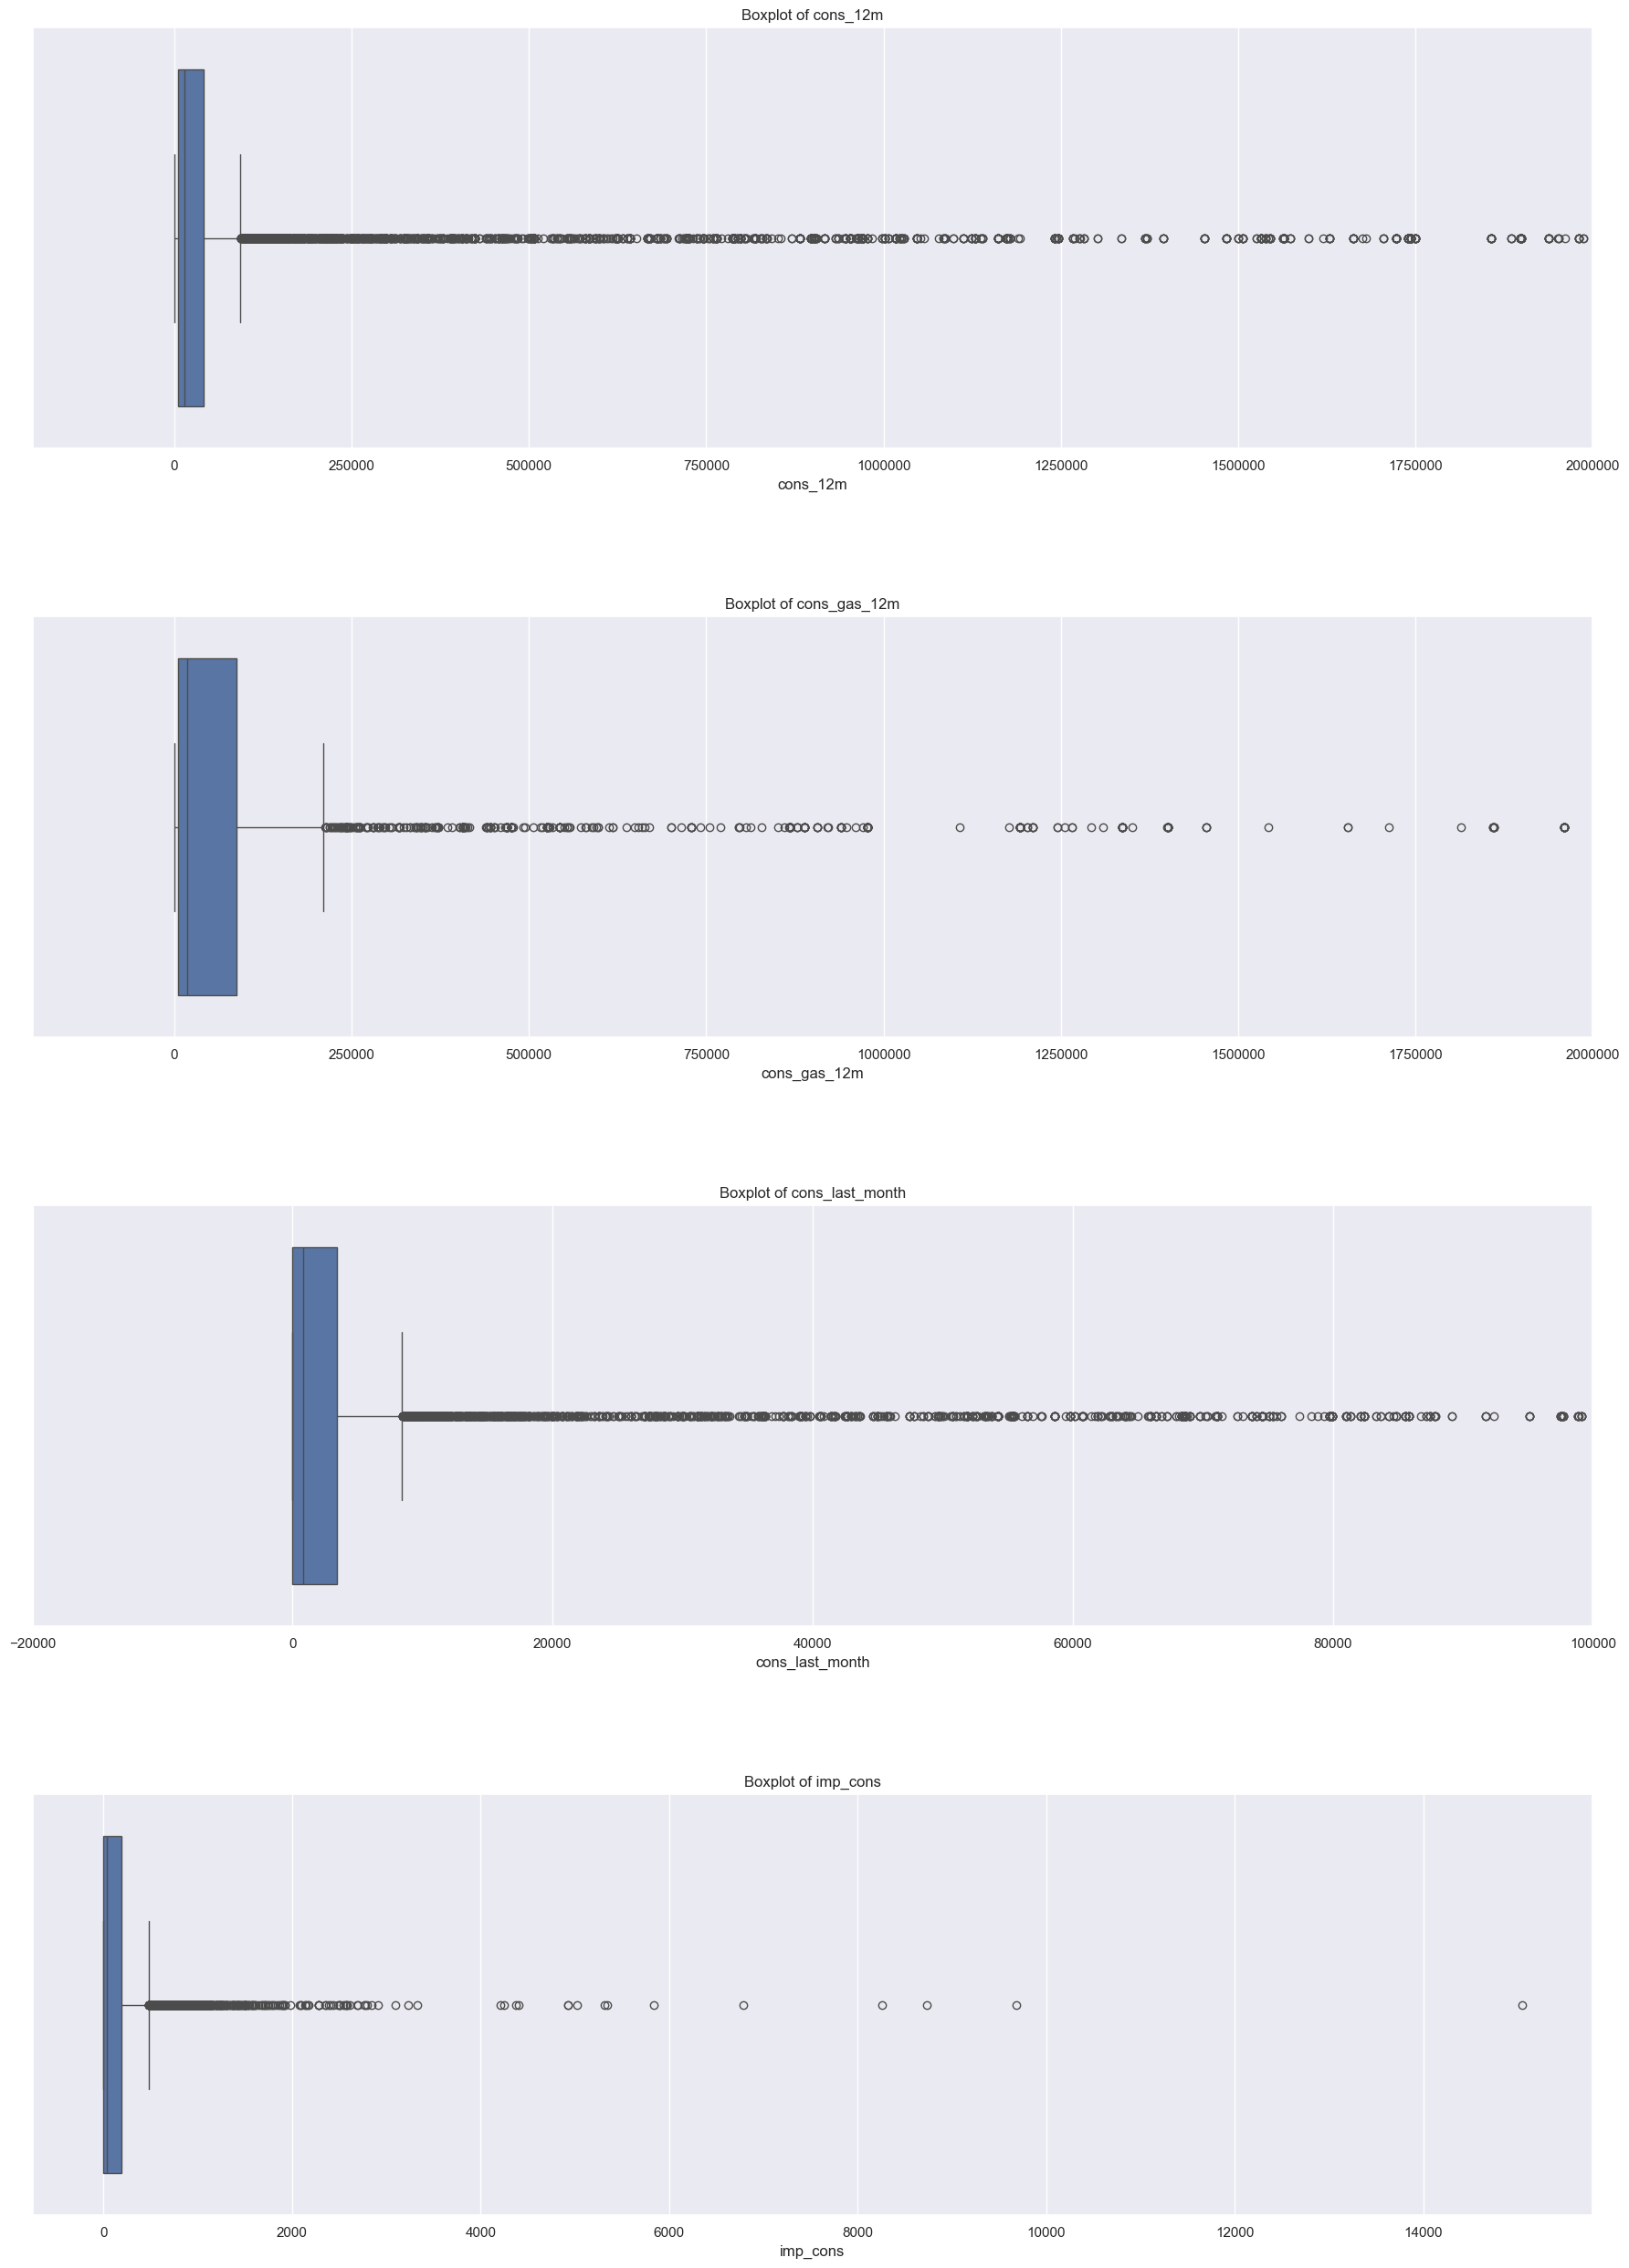

In [113]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

#We have added orient='h' to make the orientation of the boxplot horizontal which was initially vertical
sns.boxplot(consumption['cons_12m'], ax=axs[0], orient='h')
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'], ax=axs[1], orient='h')
sns.boxplot(consumption['cons_last_month'], ax=axs[2], orient='h')
sns.boxplot(consumption['imp_cons'], ax=axs[3], orient='h')

# Set the x-axis limits and labels
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)

#axs[0].set_xlabel('cons_12m')
#axs[1].set_xlabel('cons_gas_12m')
#axs[2].set_xlabel('cons_last_month')
#axs[3].set_xlabel('imp_cons')

# Set titles to identify the plots
axs[0].set_title('Boxplot of cons_12m')
axs[1].set_title('Boxplot of cons_gas_12m')
axs[2].set_title('Boxplot of cons_last_month')
axs[3].set_title('Boxplot of imp_cons')

# Remove scientific notation for x-axis
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Increase the height space between plots
plt.show()

In [114]:
forecast = client_df[["id","forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"]]

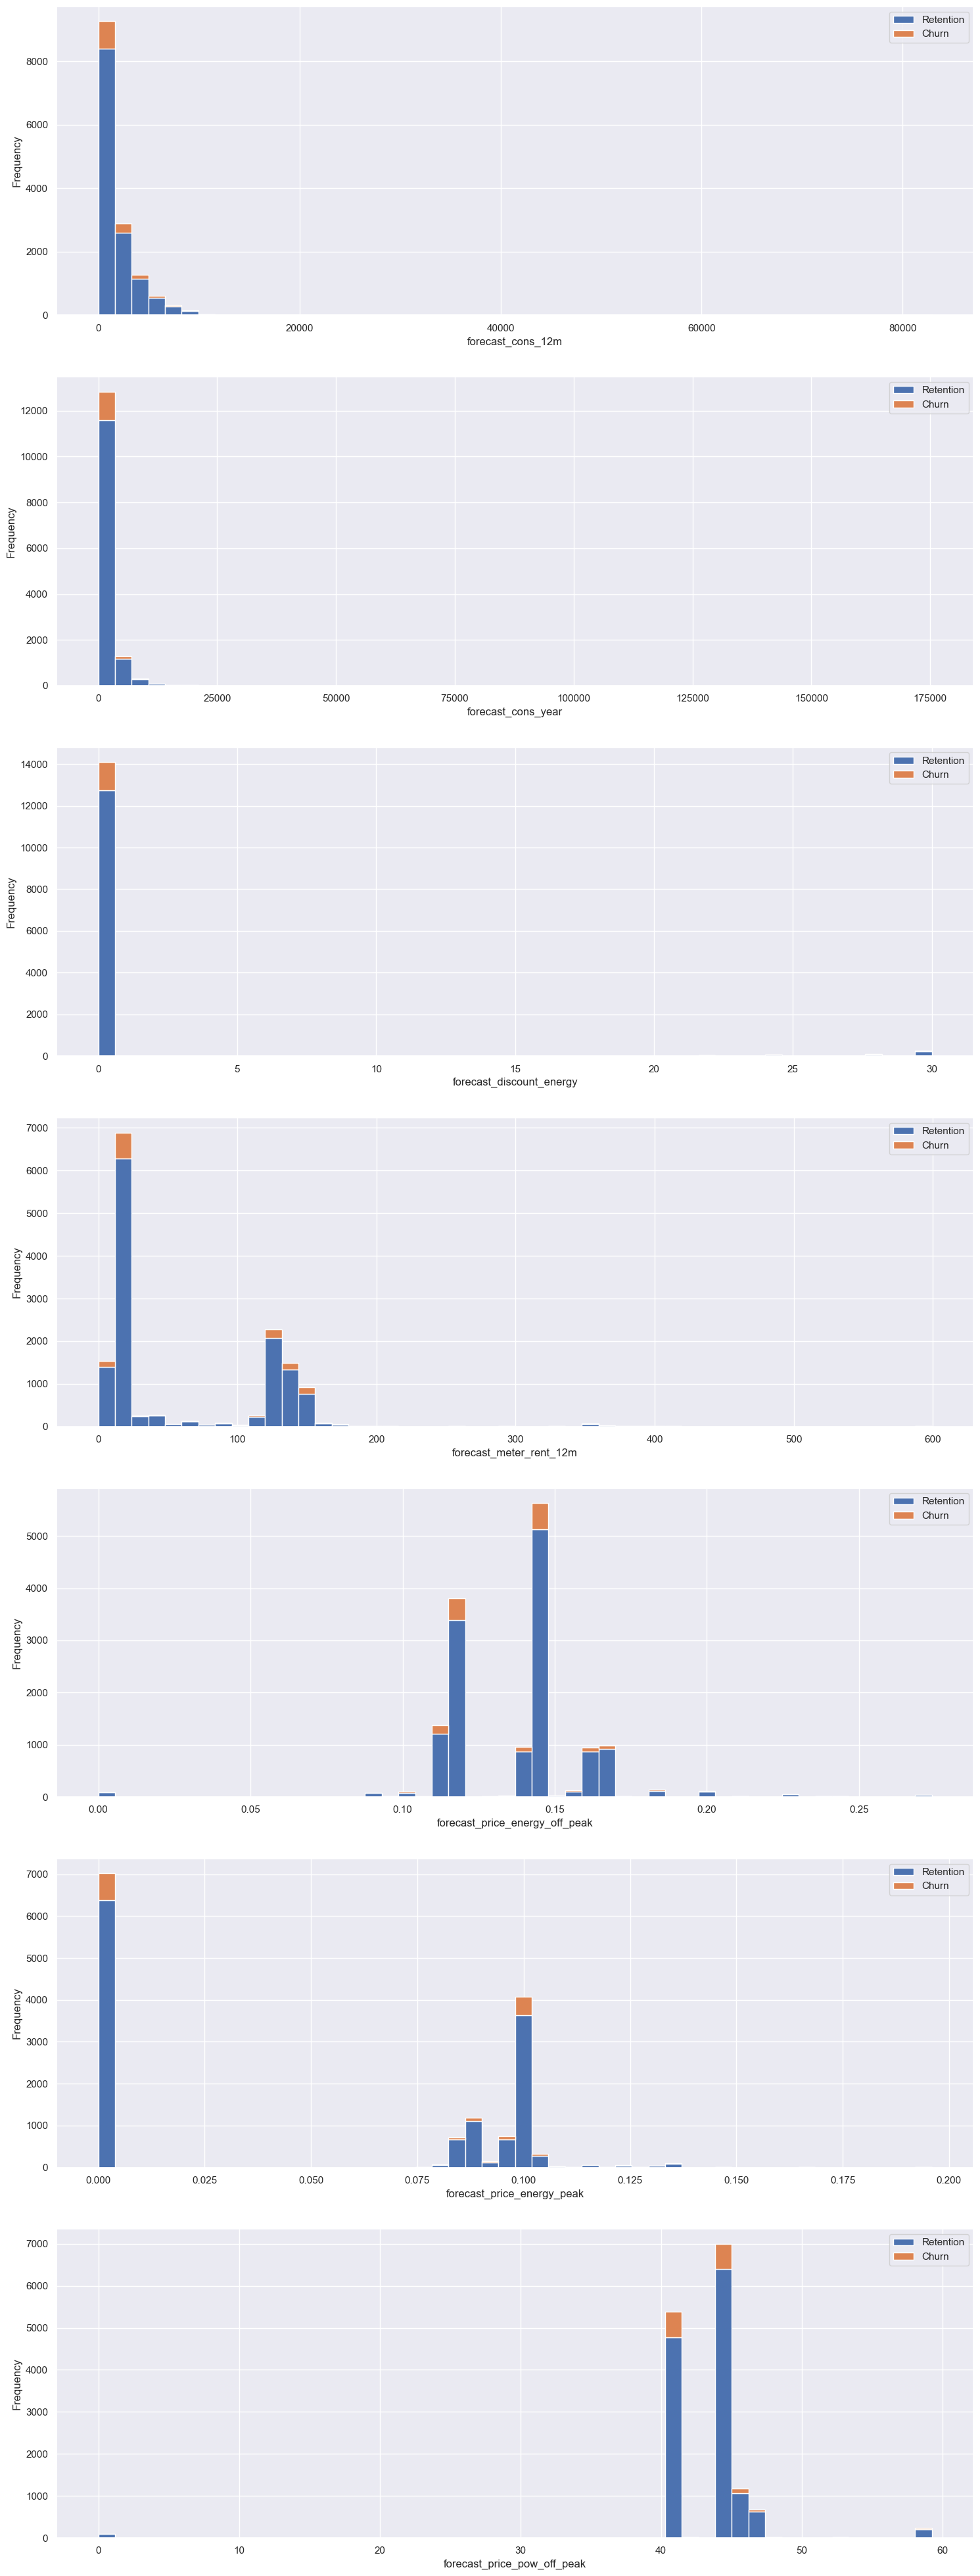

In [115]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

plotdistribution(client_df, "forecast_cons_12m", axs[0])
plotdistribution(client_df, "forecast_cons_year", axs[1])
plotdistribution(client_df, "forecast_discount_energy", axs[2])
plotdistribution(client_df, "forecast_meter_rent_12m", axs[3])
plotdistribution(client_df, "forecast_price_energy_off_peak", axs[4])
plotdistribution(client_df, "forecast_price_energy_peak", axs[5])
plotdistribution(client_df, "forecast_price_pow_off_peak", axs[6])

### Contract Type

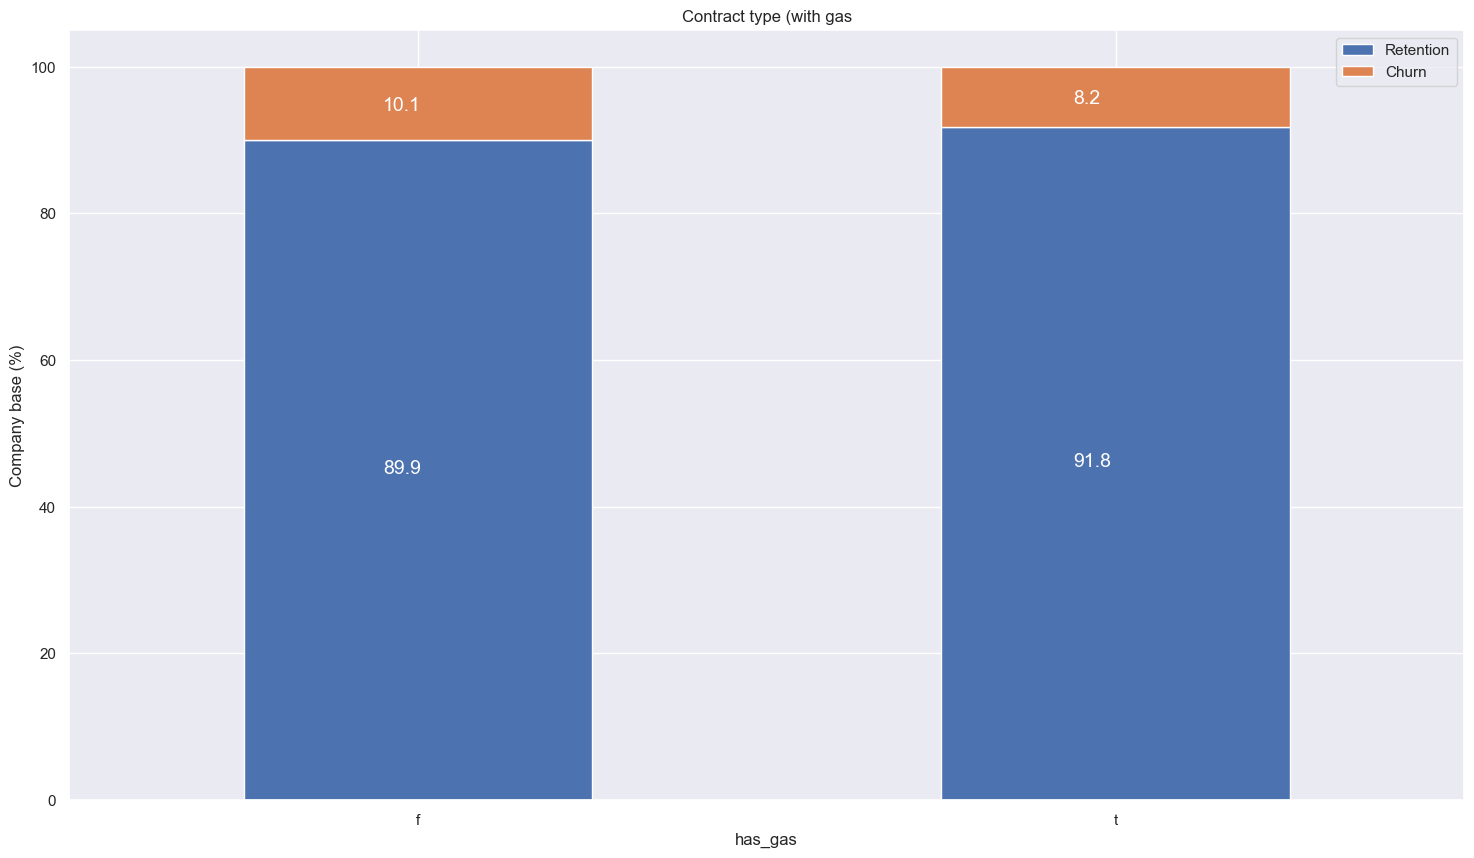

In [129]:
contract_type = client_df[['id','has_gas','churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

### Margins

In [131]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

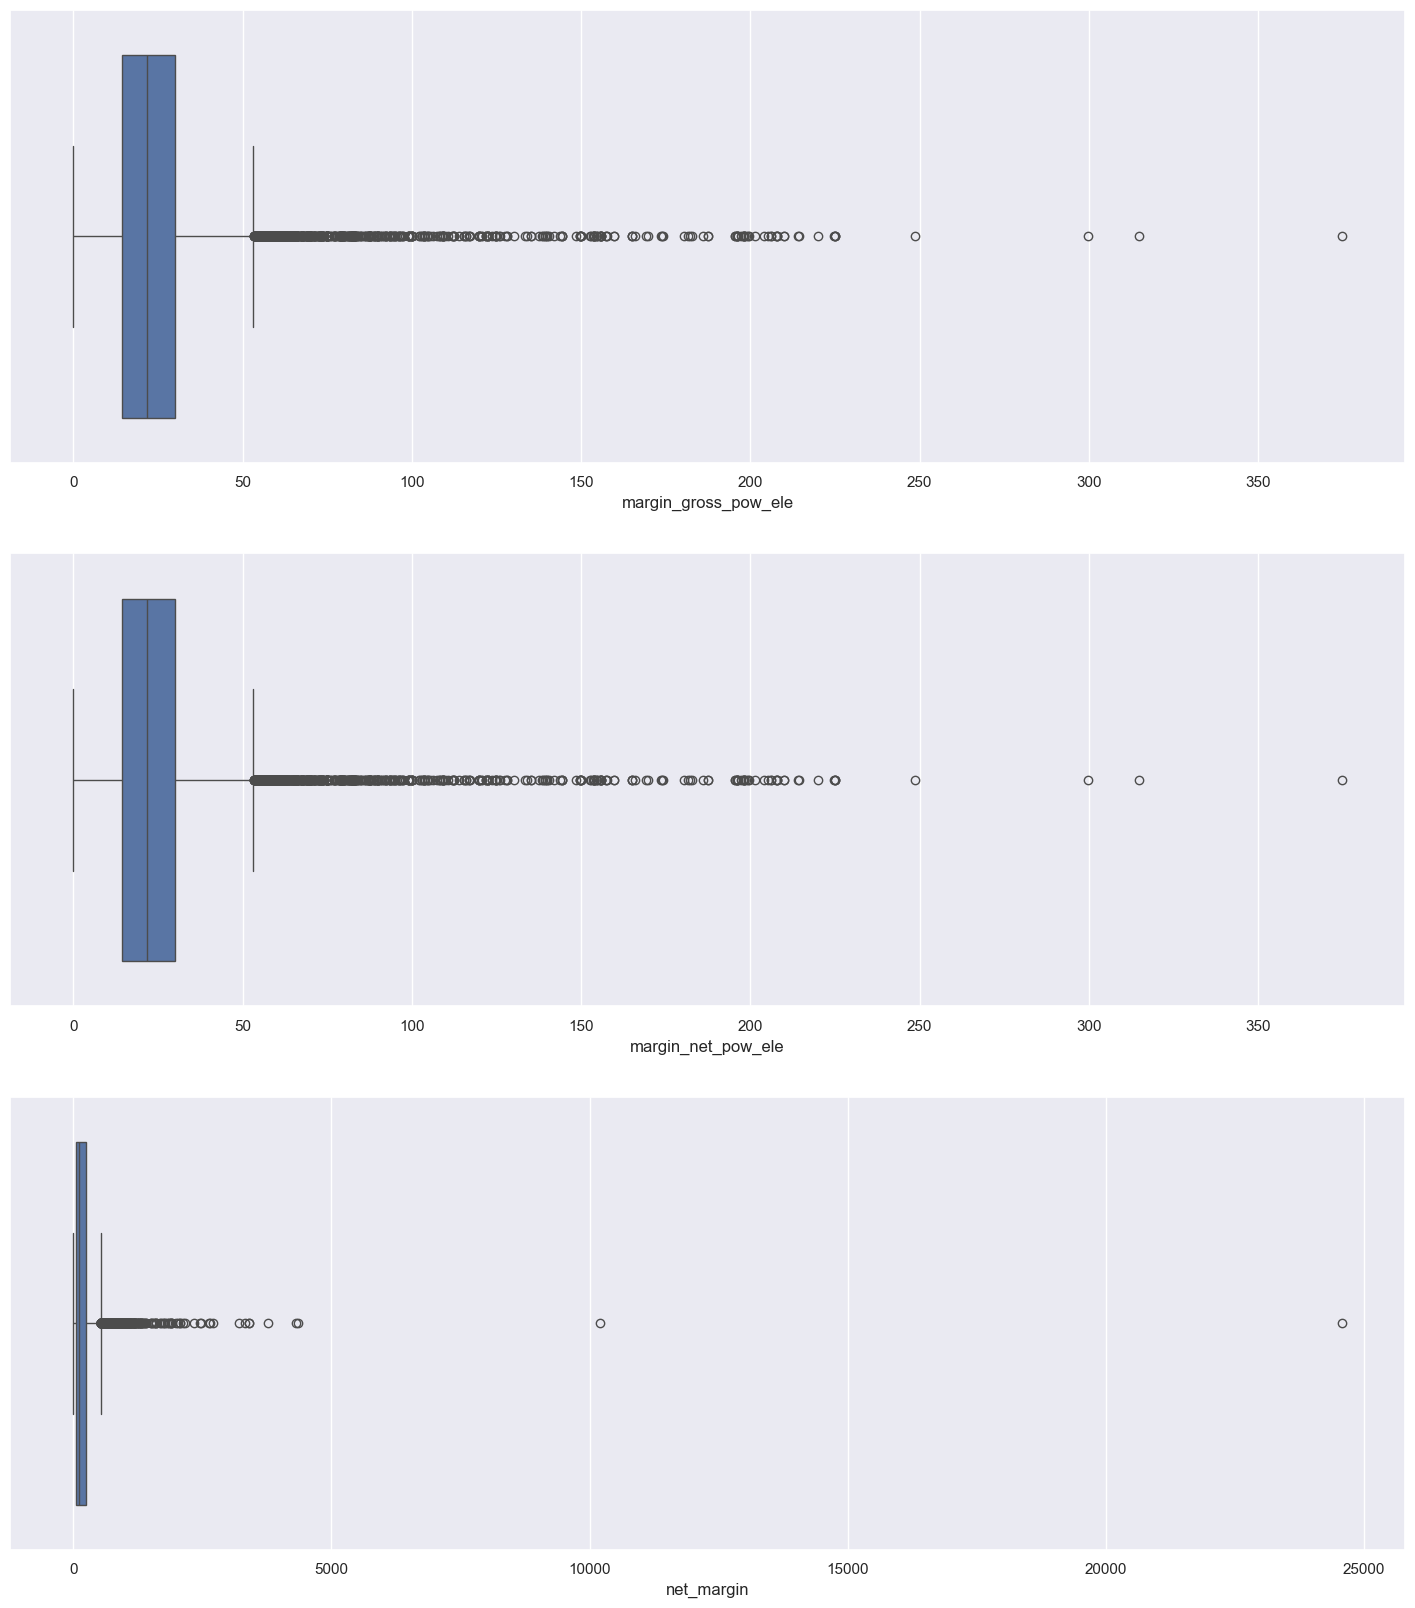

In [134]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0], orient='h')
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1], orient='h')
sns.boxplot(margin["net_margin"], ax=axs[2], orient='h')
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

### Subscribed Power

In [136]:
power = client_df[['id', 'pow_max', 'churn']]

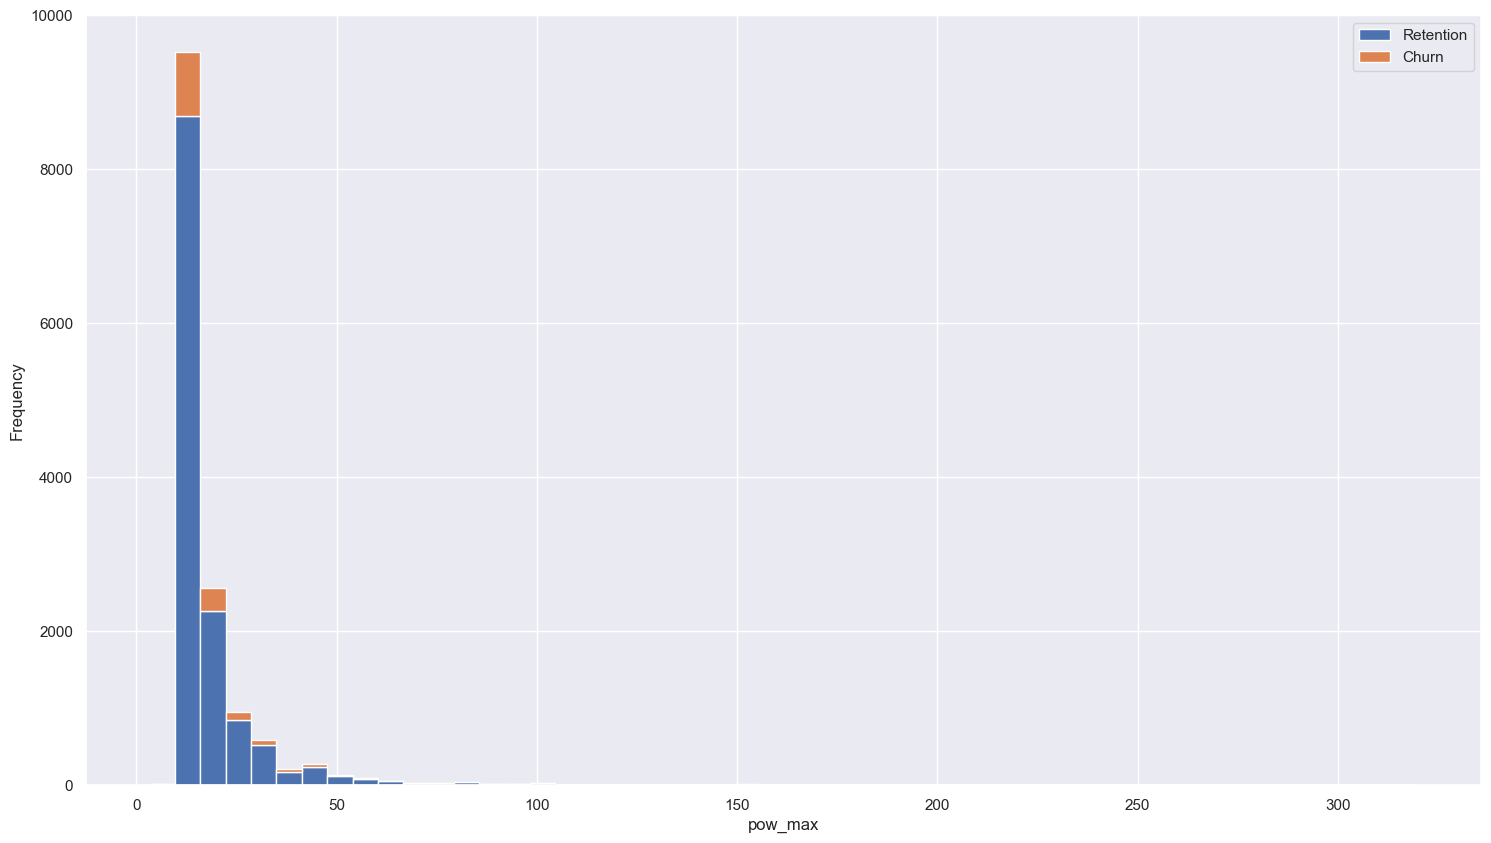

In [138]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plotdistribution(power, 'pow_max', axs)

In [139]:
### Other Columns

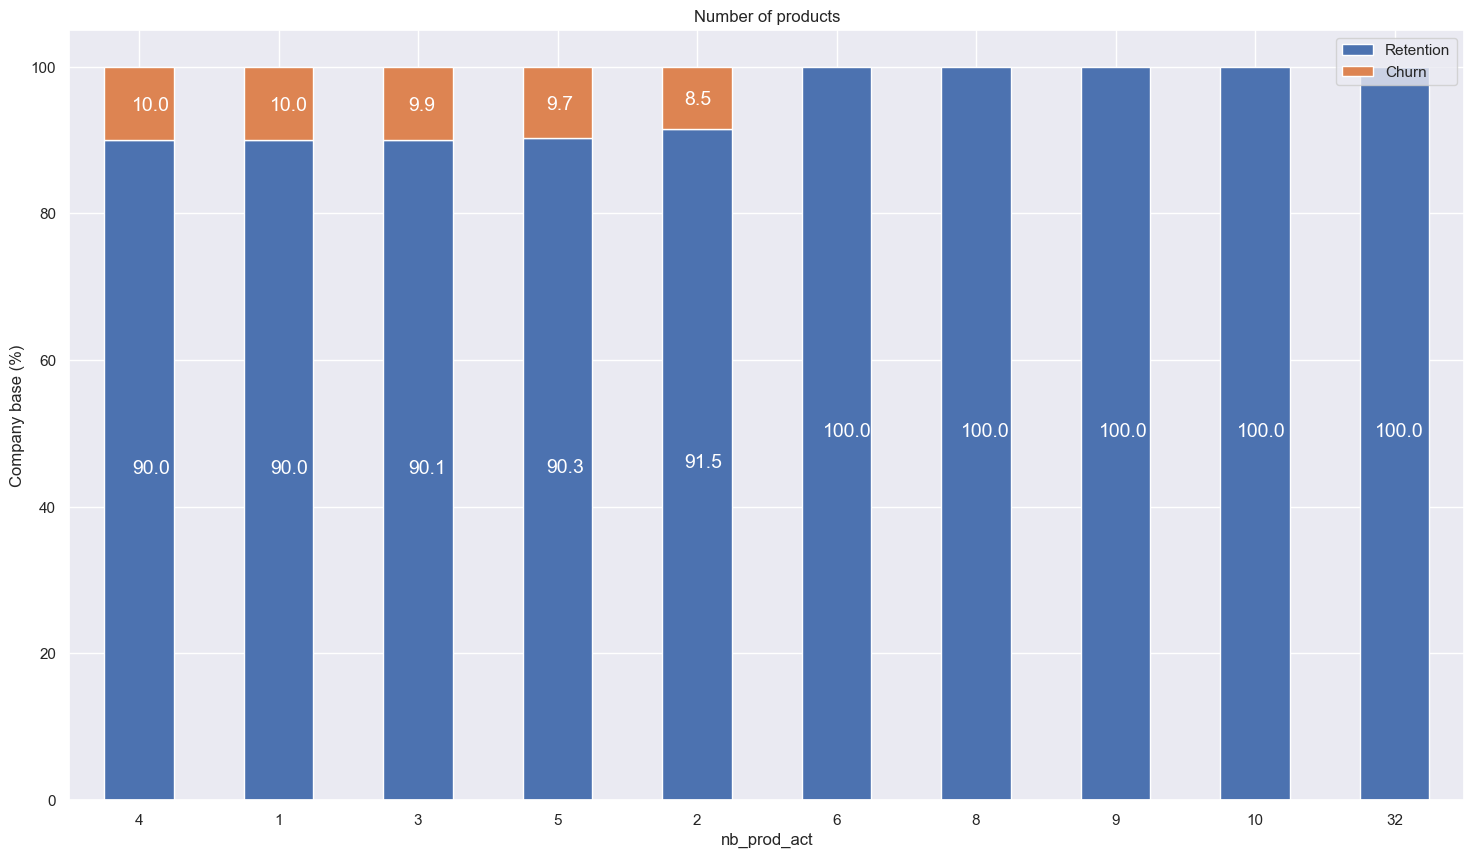

In [147]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])['id'].count().unstack(level=1)
products_percent= (products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percent, "Number of products")

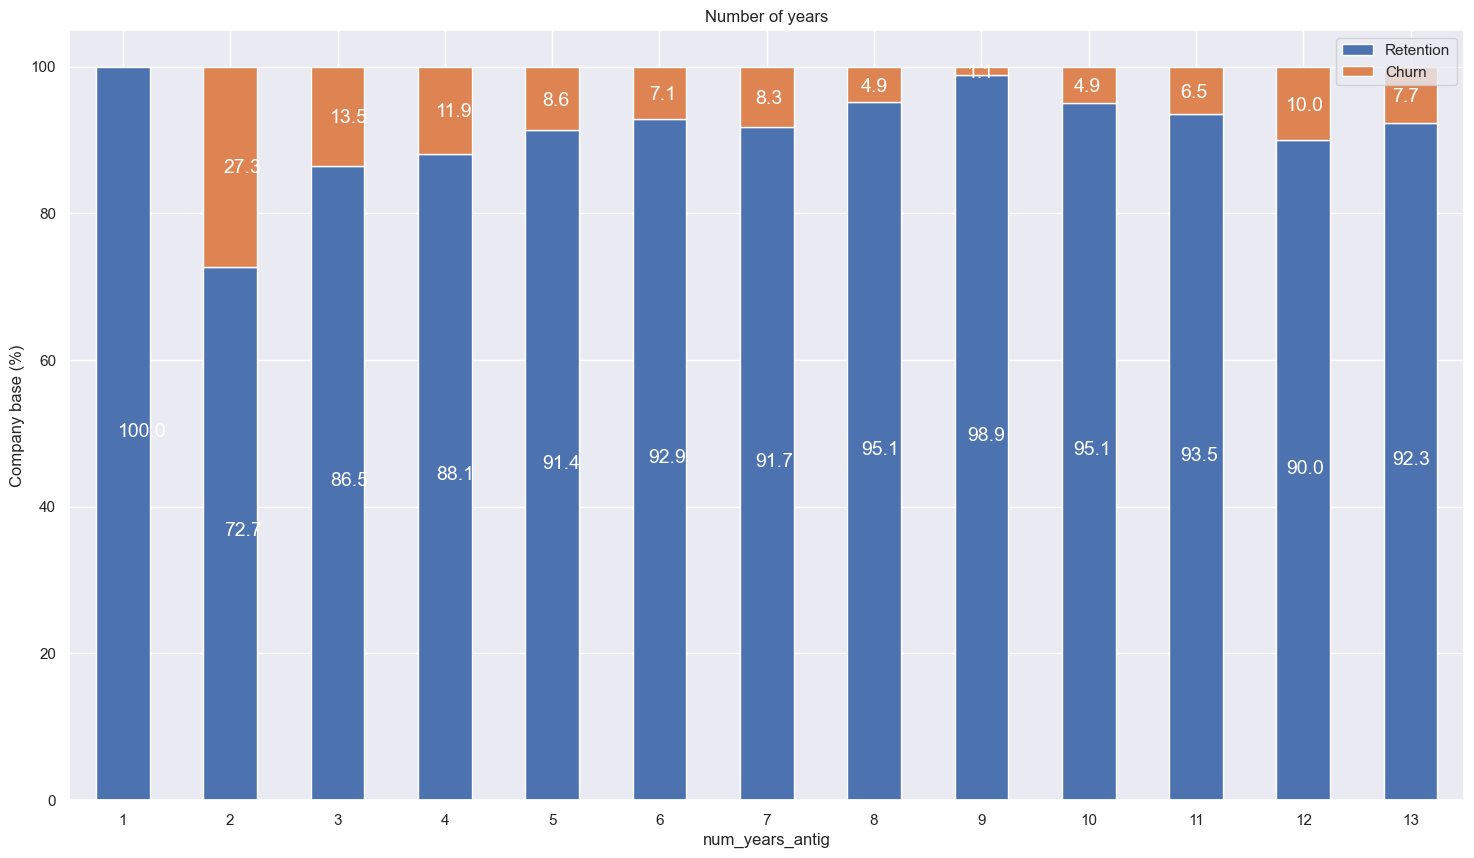

In [150]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])['id'].count().unstack(level=1)
years_antig_percent= (years_antig.div(years_antig.sum(axis=1),axis=0)*100)
plot_stacked_bars(years_antig_percent, "Number of years")

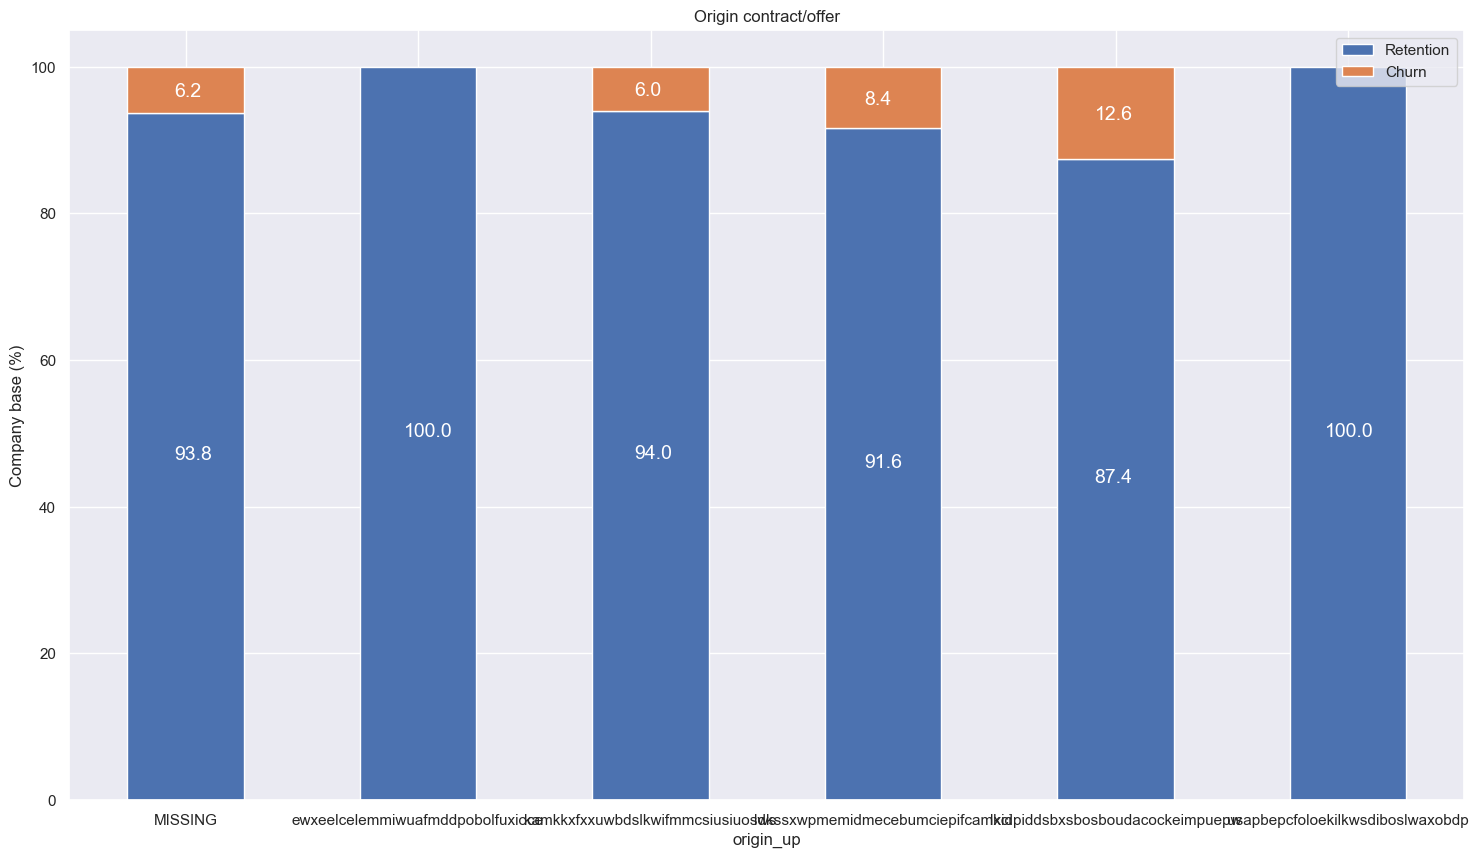

In [151]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

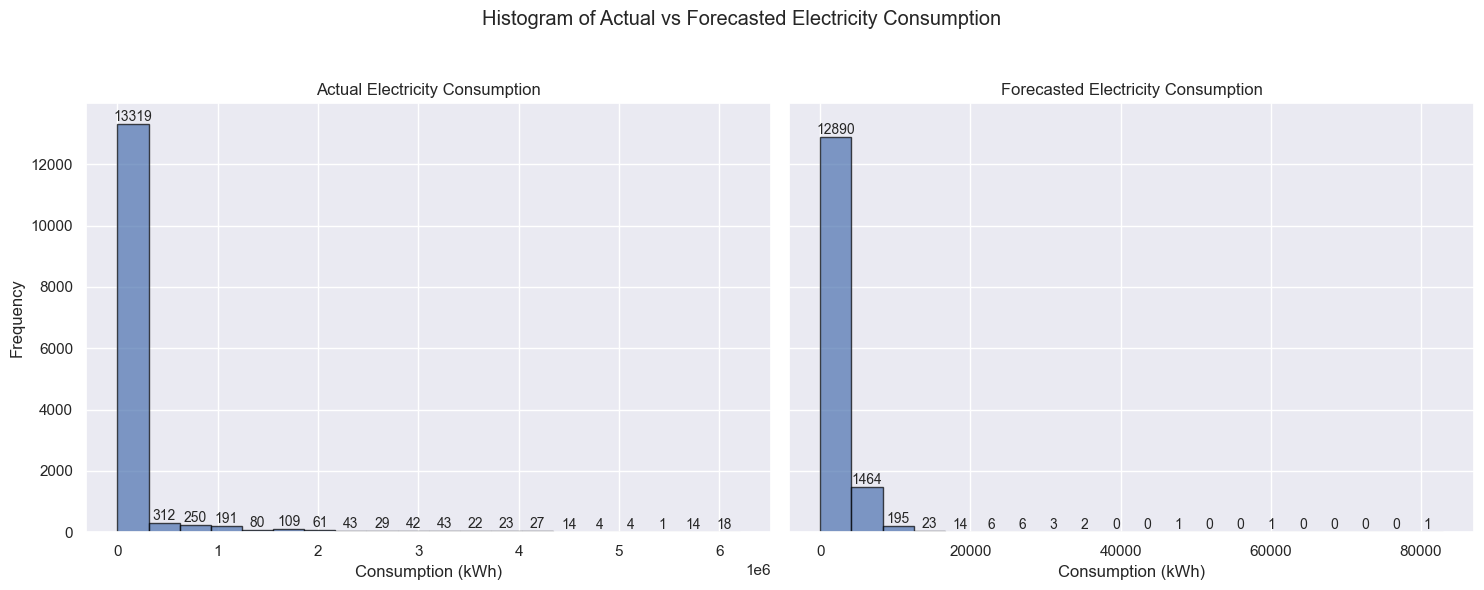

In [117]:
# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot histogram for 'cons_12m'
n1, bins1, patches1 = axs[0].hist(client_df['cons_12m'], bins=20, alpha=0.7, edgecolor='black')
axs[0].set_title('Actual Electricity Consumption')
axs[0].set_xlabel('Consumption (kWh)')
axs[0].set_ylabel('Frequency')

# Add values on top of each bar for 'cons_12m'
for rect, count in zip(patches1, n1):
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom', fontsize=10)

# Plot histogram for 'forecast_cons_12m'
n2, bins2, patches2 = axs[1].hist(client_df['forecast_cons_12m'], bins=20, alpha=0.7, edgecolor='black')
axs[1].set_title('Forecasted Electricity Consumption')
axs[1].set_xlabel('Consumption (kWh)')

# Add values on top of each bar for 'forecast_cons_12m'
for rect, count in zip(patches2, n2):
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Histogram of Actual vs Forecasted Electricity Consumption')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


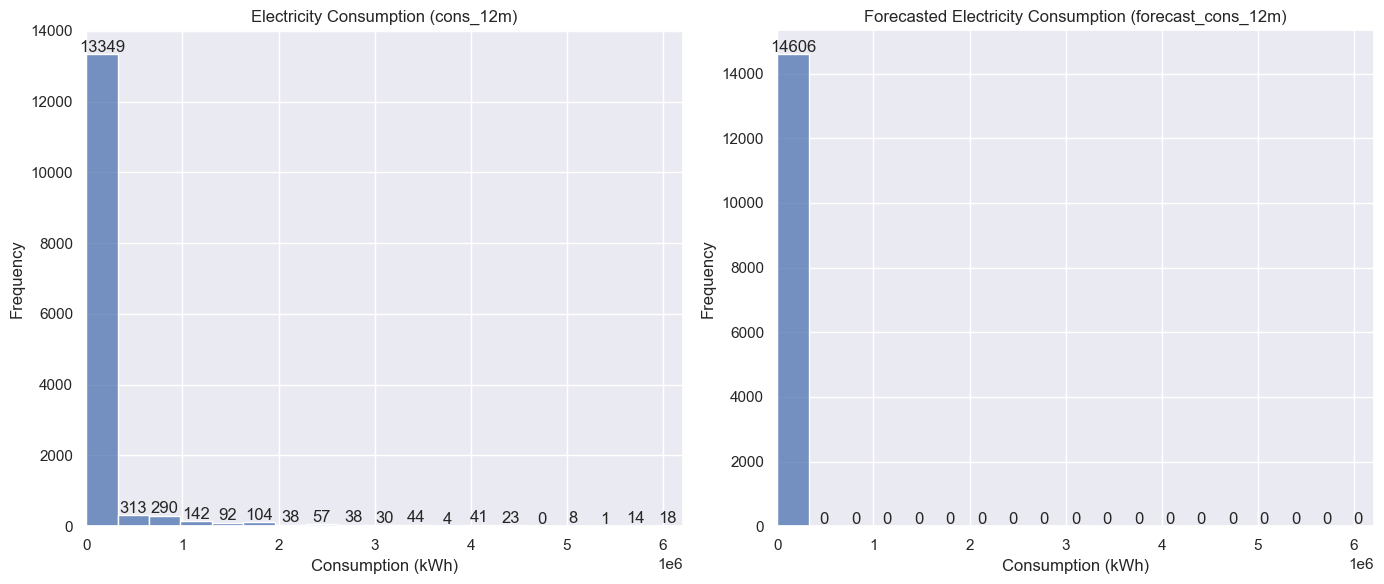

In [118]:
import numpy as np
# Define the bins for the histogram
bins = np.linspace(0, max(client_df['cons_12m'].max(), client_df['forecast_cons_12m'].max()), 20)

# Plotting side-by-side bar plots for cons_12m and forecast_cons_12m
plt.figure(figsize=(14, 6))

# Plot for cons_12m
plt.subplot(1, 2, 1)
hist = sns.histplot(client_df['cons_12m'], bins=bins, kde=False)
plt.title('Electricity Consumption (cons_12m)')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Frequency')
plt.xlim(0, max(bins))
# Adding values on top of bars
for p in hist.patches:
    height = p.get_height()
    hist.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot for forecast_cons_12m
plt.subplot(1, 2, 2)
hist = sns.histplot(client_df['forecast_cons_12m'], bins=bins, kde=False)
plt.title('Forecasted Electricity Consumption (forecast_cons_12m)')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Frequency')
plt.xlim(0, max(bins))
# Adding values on top of bars
for p in hist.patches:
    height = p.get_height()
    hist.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

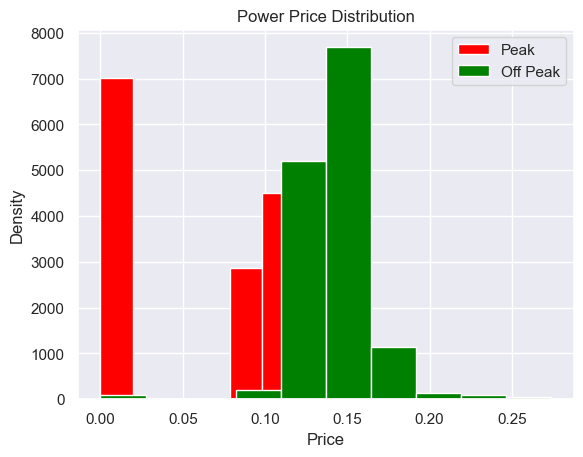

In [119]:
#Forecast Price Energy
plt.hist(client_df['forecast_price_energy_peak'], histtype='bar', color='red', label='Peak')
#plt.hist(price_df['forecast_price_pow_off_peak '], histtype='bar', color='yellow', label='Mid Peak')
plt.hist(client_df['forecast_price_energy_off_peak'], histtype='bar', color='green', label='Off Peak')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Power Price Distribution')
plt.legend()
plt.show()

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

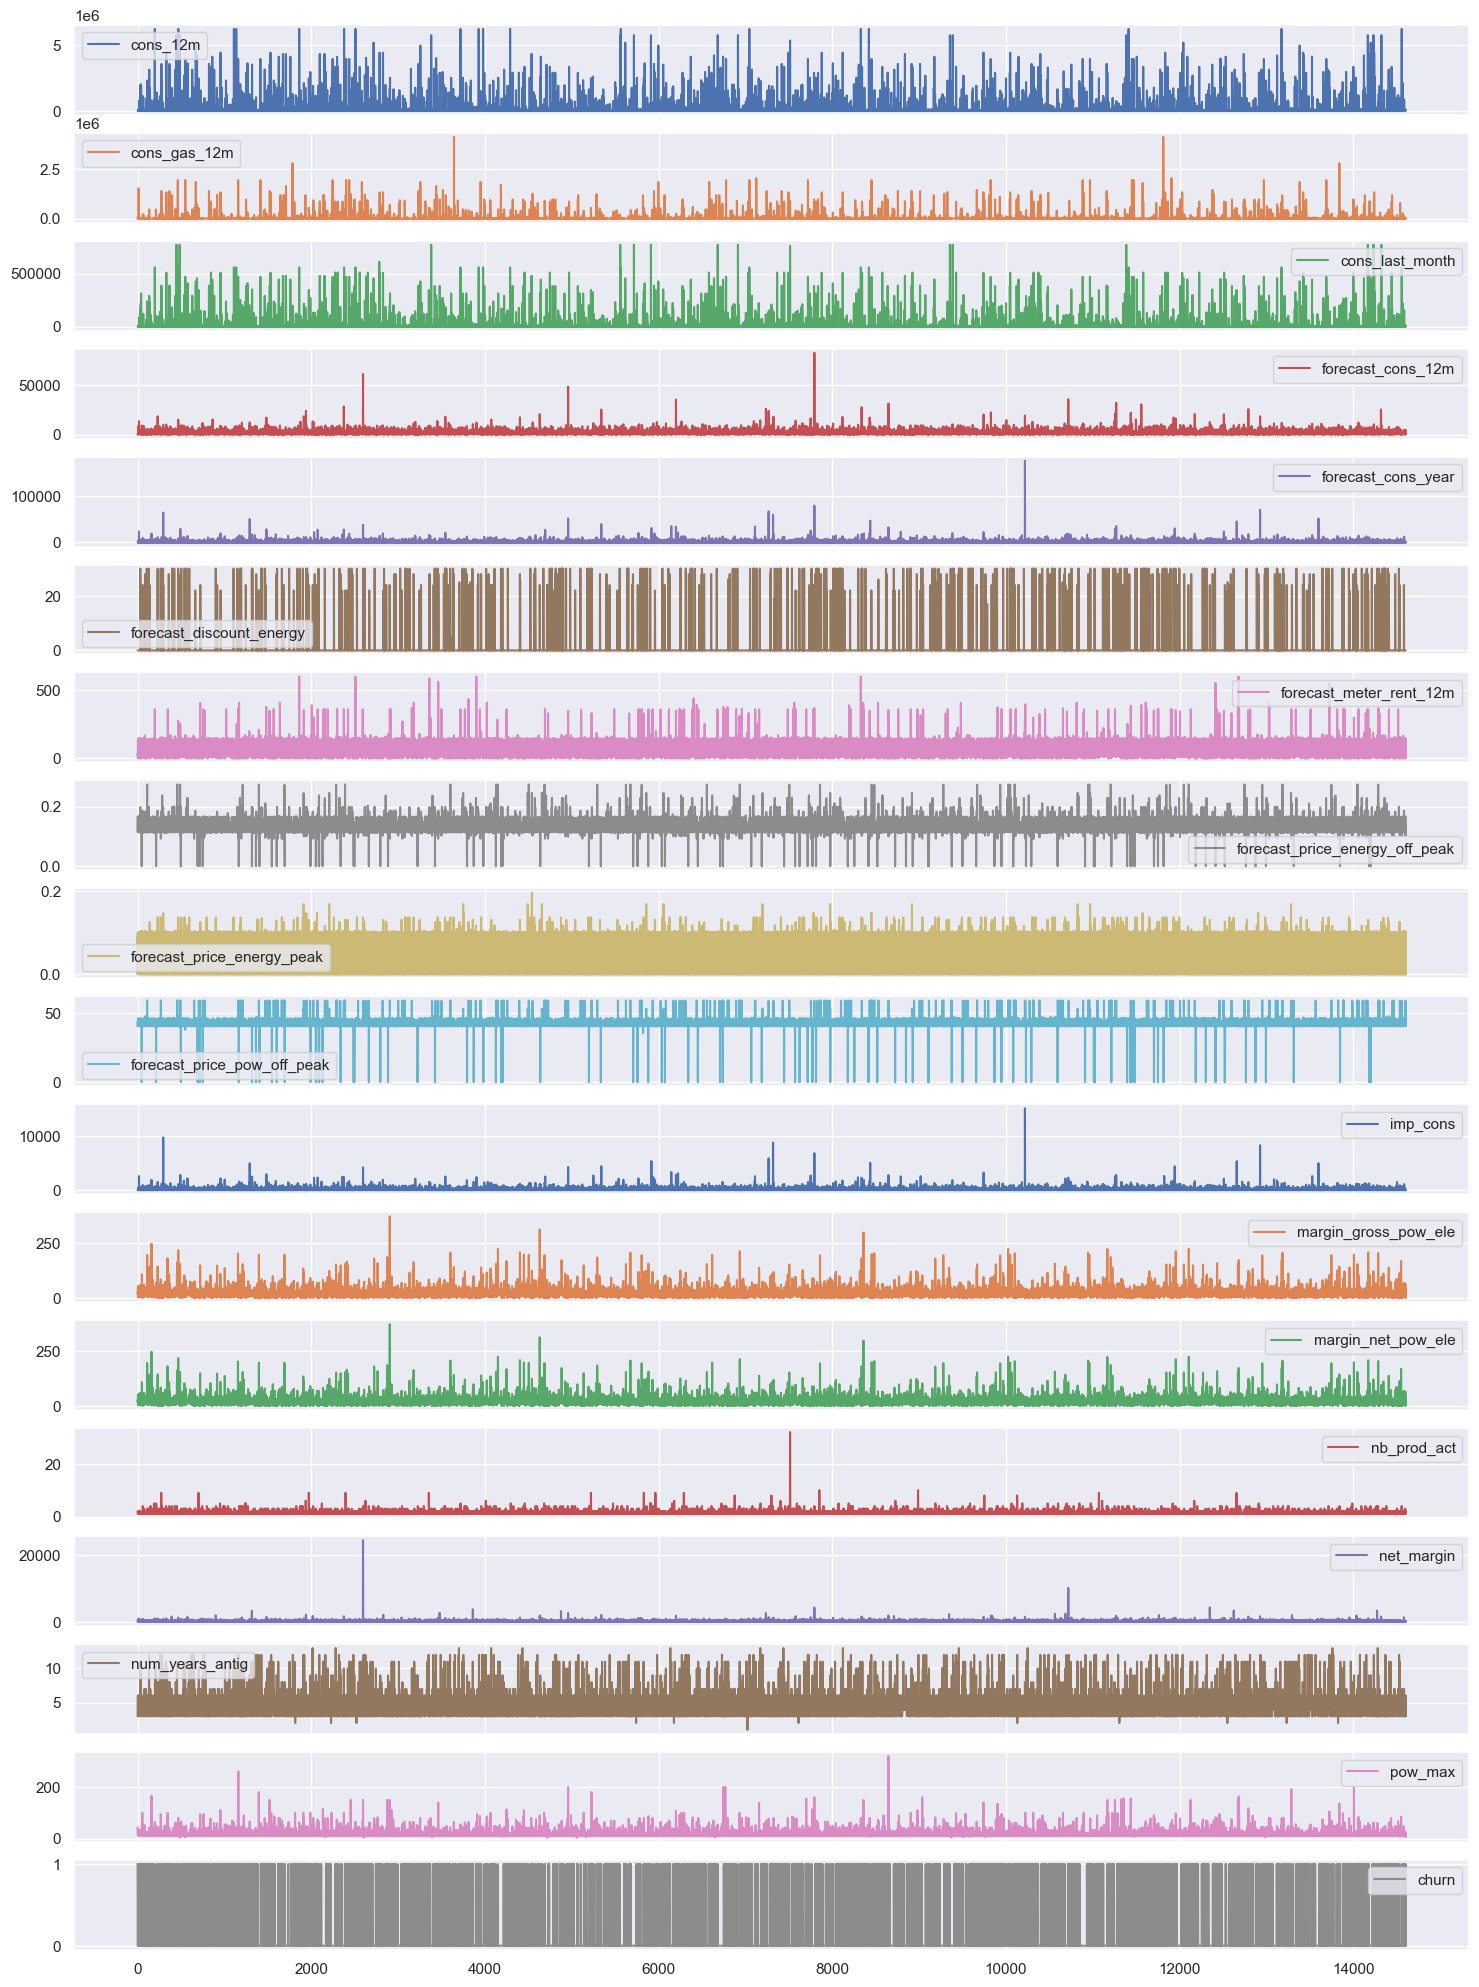

In [120]:
ax = client_df.plot(subplots=True, figsize=(18, 25))

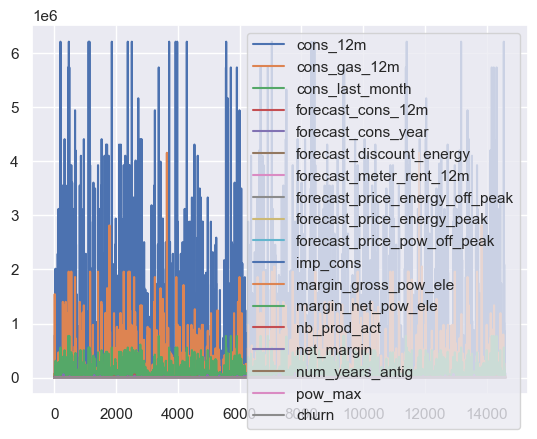

In [121]:
#ELECTRICITY CONSUMPTION OVER TIME
ax = client_df.plot(kind='line')

In [122]:
#print(sampled_data[sampled_data['cons_12m'].isnull()])

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Load the dataset
client_df = pd.read_csv('client_data.csv')

# Convert date-related columns to datetime format
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns:
    client_df[col] = pd.to_datetime(client_df[col])

# Filter relevant columns
data_df = client_df[['id', 'date_activ', 'cons_12m', 'cons_gas_12m']]

print(data_df)

# Randomly select a subset of client IDs
random.seed(42)
sample_size = 20  # Adjust the sample size as needed
sample_clients = random.sample(list(data_df['id'].unique()), sample_size)

print(sample_clients)

                                     id date_activ  cons_12m  cons_gas_12m
0      24011ae4ebbe3035111d65fa7c15bc57 2013-06-15         0         54946
1      d29c2c54acc38ff3c0614d0a653813dd 2009-08-21      4660             0
2      764c75f661154dac3a6c254cd082ea7d 2010-04-16       544             0
3      bba03439a292a1e166f80264c16191cb 2010-03-30      1584             0
4      149d57cf92fc41cf94415803a877cb4b 2010-01-13      4425             0
...                                 ...        ...       ...           ...
14601  18463073fb097fc0ac5d3e040f356987 2012-05-24     32270         47940
14602  d0a6f71671571ed83b2645d23af6de00 2012-08-27      7223             0
14603  10e6828ddd62cbcf687cb74928c4c2d2 2012-02-08      1844             0
14604  1cf20fd6206d7678d5bcafd28c53b4db 2012-08-30       131             0
14605  563dde550fd624d7352f3de77c0cdfcd 2009-12-18      8730             0

[14606 rows x 4 columns]
['01269a9df48c0b0b2215333ca34f89b9', '8f66d4e28877856d80b0ef052fad5cf7', '

In [124]:
# Filter the data for the sampled clients
sampled_data = data_df[data_df['id'].isin(sample_clients)]

print(sampled_data)

                                     id date_activ  cons_12m  cons_gas_12m
409    8b36b449c6591b27bab5a1d8f9b9291c 2010-08-13      4468             0
488    0e0e9d14b761e446d4bf33f5080bb27a 2009-10-13       170             0
520    9af7a93a580da3de0e1b6fb088d100a4 2009-09-28     61811             0
1424   6831b6491fd369eee960fa3c9a9932bd 2012-10-25     25083             0
1535   6716ccc42eeab60171509bb37bf19a5f 2011-05-30     36338             0
1679   9a027230c4c326664c49b8a77ff861f2 2009-08-15      4535          3967
1824   8f66d4e28877856d80b0ef052fad5cf7 2012-05-26     10478             0
2286   be7709d07d48491c4cd4a6af32540923 2012-12-10       466             0
3582   2dcdb5833731375c3c74333f12464f76 2010-01-14    722451        618455
3657   8c1c364bcd46583c4b02a959f14bd0a3 2009-05-06     46951             0
4012   d1e11b1e605983feb4d614833d31eaf2 2009-07-23      9083             0
4506   e062b7406a76896c0a54d816ec410f29 2012-04-19      5276             0
6912   388437f441c2e78bbe

C:\Users\japle\AppData\Local\Temp\ipykernel_28836\3844169203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['month'] = sampled_data['date_activ'].dt.to_period('M')


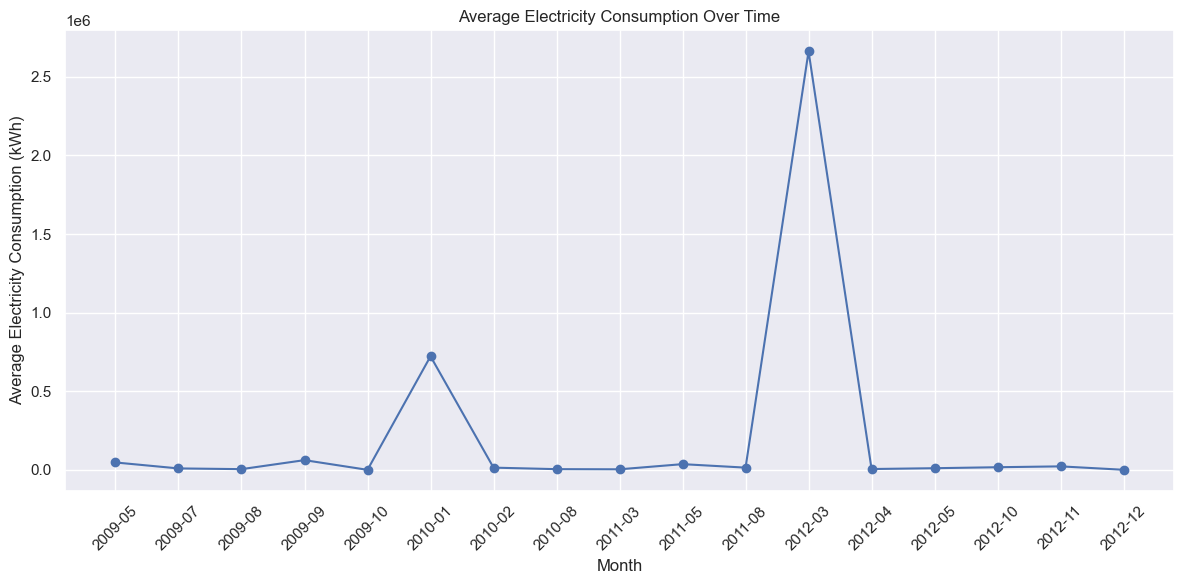

In [125]:
# Convert date_activ to month
sampled_data['month'] = sampled_data['date_activ'].dt.to_period('M')

# Group by month and calculate the average electricity consumption
average_consumption = sampled_data.groupby('month')['cons_12m'].mean()

# Plot the average electricity consumption over time
plt.figure(figsize=(12, 6))
plt.plot(average_consumption.index.astype(str), average_consumption.values, marker='o')

plt.xlabel('Month')
plt.ylabel('Average Electricity Consumption (kWh)')
plt.title('Average Electricity Consumption Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\japle\AppData\Local\Temp\ipykernel_28836\2424169608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['year'] = sampled_data['date_activ'].dt.to_period('Y')


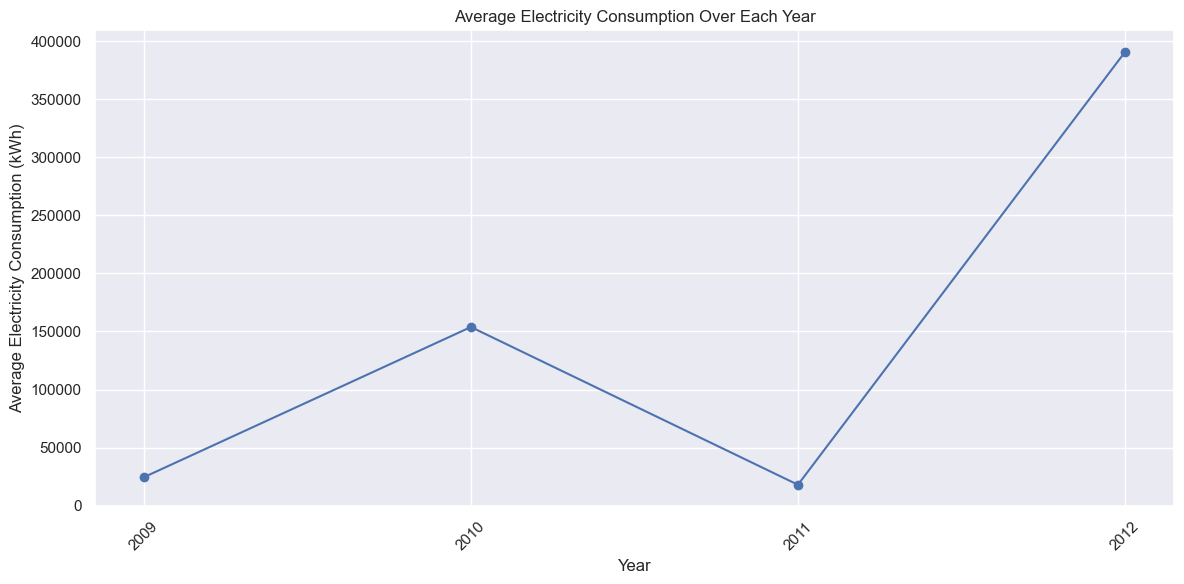

In [126]:
# Convert date_activ to year
sampled_data['year'] = sampled_data['date_activ'].dt.to_period('Y')

# Group by year and calculate the average electricity consumption
average_consumption_yearly = sampled_data.groupby('year')['cons_12m'].mean()

# Plot the average electricity consumption over each year
plt.figure(figsize=(12, 6))
plt.plot(average_consumption_yearly.index.astype(str), average_consumption_yearly.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Electricity Consumption (kWh)')
plt.title('Average Electricity Consumption Over Each Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\japle\AppData\Local\Temp\ipykernel_28836\1263418268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['month'] = sampled_data['date_activ'].dt.to_period('M')


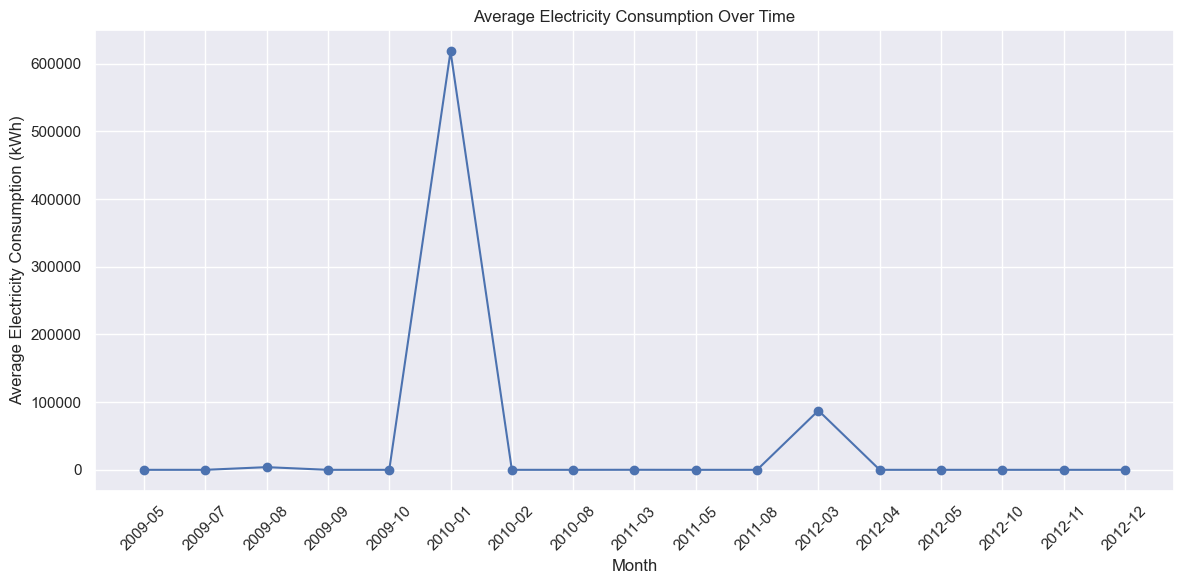

In [127]:
# Convert date_activ to month
sampled_data['month'] = sampled_data['date_activ'].dt.to_period('M')

# Group by month and calculate the average electricity consumption
average_consumption = sampled_data.groupby('month')['cons_gas_12m'].mean()

# Plot the average electricity consumption over time
plt.figure(figsize=(12, 6))
plt.plot(average_consumption.index.astype(str), average_consumption.values, marker='o')

plt.xlabel('Month')
plt.ylabel('Average Electricity Consumption (kWh)')
plt.title('Average Electricity Consumption Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\japle\AppData\Local\Temp\ipykernel_28836\2162416831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['month'] = sampled_data['date_activ'].dt.to_period('M')


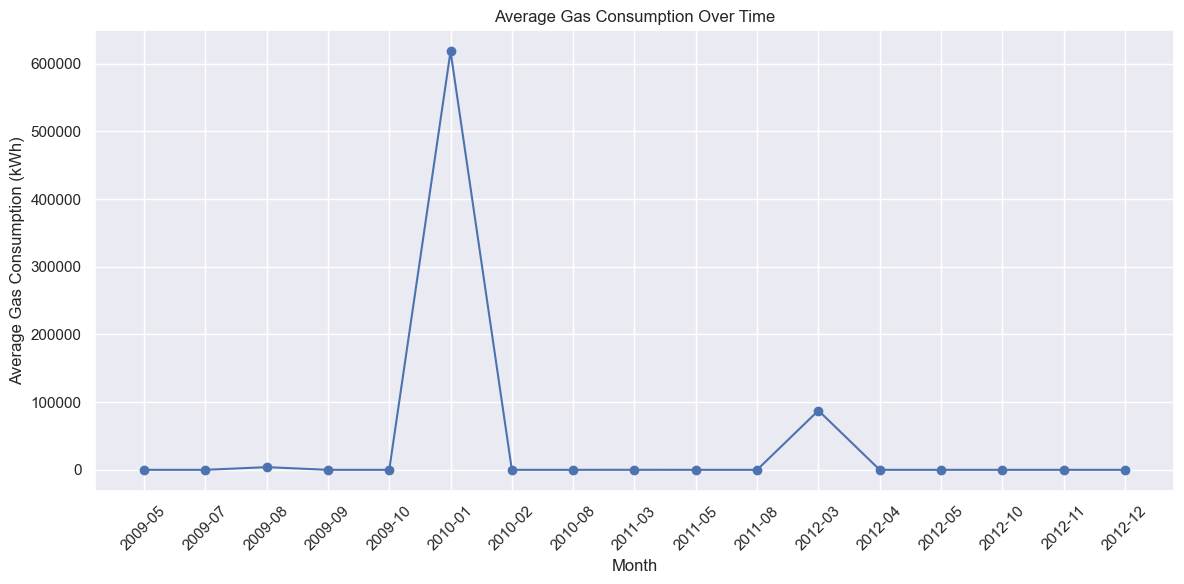

In [128]:
# Convert date_activ to month
sampled_data['month'] = sampled_data['date_activ'].dt.to_period('M')

# Group by month and calculate the average electricity consumption
average_consumption = sampled_data.groupby('month')['cons_gas_12m'].mean()

# Plot the average electricity consumption over time
plt.figure(figsize=(12, 6))
plt.plot(average_consumption.index.astype(str), average_consumption.values, marker='o')

plt.xlabel('Month')
plt.ylabel('Average Gas Consumption (kWh)')
plt.title('Average Gas Consumption Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()